# jupyter 主题的设置：
然后可以查看所有可用的主题：
命令行执行jt -l
Available Themes:
   chesterish
   grade3
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
可以在命令行持续下面代码切换要用的主题。
命令行执行：jt -t 主题名称
如果要恢复默认：
命令行执行：jt -r

In [1]:
import requests
res = requests.get('https://www.baidu.com')
res.encoding = 'utf-8'
# print(res.text)

#  数据挖掘实战教程二


In [1]:
#数据的特征观察
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
df = pd.read_csv(fname)
# data.head(5)
amh = df['average_monthly_hours']
amh.mean()
amh.std()
amh.max()
amh.min()
amh.skew()#这是偏度，就是偏离均值的，偏移量
amh.kurt()#峰度，
#利用四分位数，去除异常值，高级方法
amh_n = amh[amh<amh.quantile(0.75)+1.5*(amh.quantile(0.75)-amh.quantile(0.25))][amh>amh.quantile(0.25)-1.5*(amh.quantile(0.75)-amh.quantile(0.25))]
len(amh_n)



#使用np.histogram()方法绘制数据的直方图，由于原数据为pandas的DataFrame格式数据,只要使用amh_n.values方法就可以转为numpy的array数据，然后调用numpy的方法 

np.histogram(amh_n.values,bins= 10)
np.histogram(amh_n.values,bins = np.arange(amh_n.min(),amh_n.max()+10,10))
# amh_n.value_counts(bins = np.arange(amh_n.min(),amh_n.max()+10,10))
#使用pandas下面的values_counts(bins ='柱子的个数和范围' ).plot(kind = 'bar') 可以画出数据来
amh_n.value_counts(bins = np.arange(amh_n.min(),amh_n.max()+10,10)).plot(kind = 'bar')   #numpy中的arange()相当于python中的range()
#输出组距为10的柱状图的分组数据
amh_n.value_counts(bins = np.arange(amh_n.min(),amh_n.max()+10,10))

(146.0, 156.0]     1277
(136.0, 146.0]     1159
(256.0, 266.0]     1063
(236.0, 246.0]     1006
(156.0, 166.0]      995
(246.0, 256.0]      987
(126.0, 136.0]      886
(216.0, 226.0]      873
(266.0, 276.0]      860
(166.0, 176.0]      832
(226.0, 236.0]      814
(176.0, 186.0]      813
(186.0, 196.0]      761
(196.0, 206.0]      755
(206.0, 216.0]      731
(276.0, 286.0]      319
(95.999, 106.0]     187
(286.0, 296.0]      164
(116.0, 126.0]      162
(106.0, 116.0]      162
(296.0, 306.0]      128
(306.0, 316.0]       68
Name: average_monthly_hours, dtype: int64

In [10]:
# 获取数据的time_spend_company这列数据进行分析
tsc = df['time_spend_company']
tsc.head(5)
#统计该列的相同数的个数
tsc.value_counts().sort_index()
tsc.mean()

3.498066924410079

In [12]:
#查看Work_accident列数据
wc = df['Work_accident']
wc.value_counts()
wc.mean()

0.14458072257032395

In [14]:
#查看left数据
lf = df['left']
lf.value_counts()

0    11428
1     3574
Name: left, dtype: int64

In [15]:
#查看promotion_last_5years列
pl5 = df['promotion_last_5years']
pl5.value_counts()

0    14683
1      319
Name: promotion_last_5years, dtype: int64

In [21]:
#查看salary
s_s = df['salary']  #获取数据转为Series格式
s_s.value_counts() #查看数值是否异常
#使用where('判断条件')得到一个数组，数组中为判断条件若为true的值返回原值，如果不是条件中的值则返回空值NaN  ， 然后我们取反，就可以将异常值设为NaN了
s_s.where(s_s == 'nme') #找出异常值
s_s.where(s_s != 'nme').dropna() #将异常值设为空值并使用dropna()去除掉
s_s.where(s_s != 'nme').dropna().value_counts()



low       7318
medium    6446
high      1237
Name: salary, dtype: int64

In [30]:
# 查看department列
dp = df['department']
dp.value_counts(normalize = True)
dp.where(dp != 'sale').dropna().value_counts()

sales          4140
technical      2720
support        2230
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
df = pd.read_csv(fname)
# data.head(5)

#上面数据的简单对比

#使用DataFrame对数据进行整体的操作

#对上面的数据进行总的处理,使用DataFrame对数据进行处理，与上面不同，上面是分别对每一列进行处理，即是对每个Series进行处理

# 下面使用的是DataFrame直接对整个表的所有数据进行处理


#去掉所有列中的空值
df = df.dropna(axis = 0,how = 'any')  #axis = 0，表示只删除空值所在的那一行的全部数据，axis = 1表示删除空值所在的那一列的全部数据
# df.describe()
#去掉各列的异常值
# df[(条件一)][(条件二)][(条件三)]...利用这样的格式筛选出DataFrame中的符合条件的各行各列数据
df = df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']
print(len(df))
# print(df)
df.to_excel('e:/py/数据挖掘教程二/HR.xlsx',index = False) #将处理好的数据保存到excel中
#对各列进行分组，使用groupby('要参照分组的列名')方法,按照department列来分组
# df.groupby('department').mean()

e:\studypython\study\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


14999


#  数据可视化，matplotlib，seaborn

# seaborn 库是matplotlib库的一个封装，seaborn更简单，matplotlib更灵活

# 两者一定程度上可以交叉使用

# seaborn 详细请看 https://blog.csdn.net/suzyu12345/article/details/69029106
    python seaborn画图
    在做分析时候，有时需要画几个图看看数据分布情况，但总记不住python的绘图函数。今天有空顺便整理下python的seaborn绘图函数库。 
    Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。

    seaborns是针对统计绘图的，方便啊。

    一般来说，seaborn能满足数据分析90%的绘图需求，够用了，如果需要复杂的自定义图形，还是要matplotlit。这里也只是对seaborn官网的绘图API简单翻译整理下，对很多参数使用方法都没有说到，如果需要精细绘图，还是需要参照其seaborn的文档的。

    这里简要介绍常用的图形，常用的参数，其精美程度不足以当做报告绘图，算是做笔记吧。

    1.几个概念
    如果使用过R语言的ggplot2绘图包，对分组分面，统计绘图等概念应该很熟悉，这里也介绍下。

    1.1.分组绘图
    比如说需要在一张图上绘制两条曲线，分别是南方和北方的气温变化，分别用不同的颜色加以区分。在seaborn中用hue参数控制分组绘图。

    1.2.分面绘图
    其实就是在一张纸上划分不同的区域，比如2*2的子区域，在不同的子区域上绘制不同的图形，在matplotlib中就是 add_subplot(2,2,1)，在seaborn中用col参数控制，col的全称是columns，不是color，如果辅助col_wrap参数会更好些。后来发现，col可以控制columns的子图，那么row可以控制rows的子图排列。 
    如果需要分面绘图，应该使用seaborn的FacetGrid对象，seaborn的一般的绘图函数是没有分面这个参数的。

    1.3.统计函数
    分组绘图的时候，会对分组变量先要用统计函数，然后绘图，比如先计算变量的均值，然后绘制该均值的直方图。统计绘图参数是 estimator，很多情况下默认是numpy.mean。在ggplot2中就大量使用了这种方法。如果不适用统计绘图，就需要先用pandas进行groupby分组汇总，然后用seaborn绘图，多此一举了。

    2.图形分类
    在seaborn中图形大概分这么几类，因子变量绘图，数值变量绘图，两变量关系绘图，时间序列图，热力图，分面绘图等。

    因子变量绘图

    箱线图boxplot
    小提琴图violinplot
    散点图striplot
    带分布的散点图swarmplot
    直方图barplot
    计数的直方图countplot
    两变量关系图factorplot
    回归图 
    回归图只要探讨两连续数值变量的变化趋势情况，绘制x-y的散点图和回归曲线。

    线性回归图lmplot
    线性回归图regplot
    分布图 
    包括单变量核密度曲线，直方图，双变量多变量的联合直方图，和密度图

    热力图 
    1. 热力图heatmap

    聚类图 
    1. 聚类图clustermap

    时间序列图 
    1. 时间序列图tsplot 
    2. 我的时序图plot_ts_d , plot_ts_m

    分面绘图 
    1.分面绘图FacetGrid

    3.因子变量绘图
    3.1.boxplot箱线图

#  柱形图的绘画

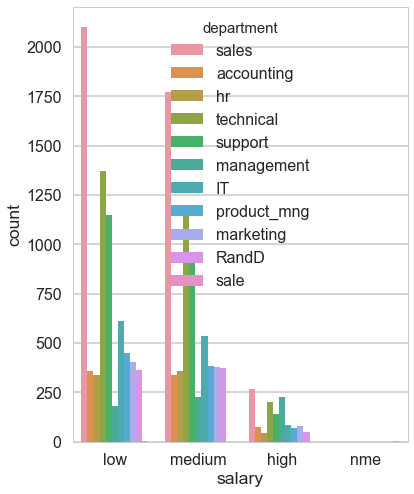

In [38]:
#可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
df = pd.read_csv(fname)
plt.figure(figsize=(6,8))
# sns.set_style(style = 'darkgrid')

#matplotlib可视化
#1.画条形图
# plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width = 0.5) #+0.5是使柱子右移0.5个单位
# plt.title('salary')
# plt.xlabel('salary')
# plt.ylabel('Num')
# #给X轴做标注plt.xticks('要标注的值的数组','每个组下面要标记的内容')
# plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)   #这里+0.5的意思是X轴的标注右移0.5个单位
# # Series或DataFrame中使用到的数组或者序列的标签都转化为一个index

# #设置X轴与y轴的取值范围
# plt.axis([0,4,0,10000]) #plt.axis([a,b,c,d]) 其中(a,b)是X轴的取值范围，(c,d)是Y轴的取值范围

# #重点，为柱子添加数值的方法，使用一个for循环，配合plt.text()方法

# #zip函数的原型为：zip([iterable, …]) ,通常配合np.arange()方法使用
# # 参数iterable为可迭代的对象，并且可以有多个参数。该函数返回一个以元组为元素的列表，其中第 i 个元组包含每个参数序列的第 i 个元素。
# # 返回的列表长度被截断为最短的参数序列的长度。
# # 只有一个序列参数时，它返回一个1元组的列表。没有参数时，它返回一个空的列表。
# for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
#     plt.text(x,y,y,ha = 'center',va = 'bottom')

    
    

#使用seaborn绘图，因为seaborn是基于matplotlib库的，故plt.show()也可以绘画seaborn的图

#设置背景风格
sns.set_style(style = 'whitegrid') #详细参数看seaborn的API  http://seaborn.pydata.org/api.html
#设置字体
sns.set_context(context = 'poster',font_scale = 1)
#设置颜色 具体参数查看  https://matplotlib.org/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py 色谱图
sns.set_palette('summer')
#设置颜色方法二,使用matplotlib的色板
# sns.set_palette([sns.color_palette('RdBu',n_colors = 7)[5]])
# 2.直接使用seaborn绘制柱状图，更方便，很多东西都帮你设置好了，但是不够matplotlib灵活，但是两者都是一个库的东西，有些东西可以共用的
sns.countplot(x = 'salary',hue = 'department',data = df) 
#sns.countplot(x = 'Dataframe的某列数据的列名（标签名）',hue = '多层绘制的列名', data = '总DataFrame数据') 
#柱子颜色自己会帮你设定
plt.show()


#  直方图的绘画

# 直方图反映的是一个范围区间内，各个值的面积的占比多少

e:\studypython\study\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
e:\studypython\study\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
e:\studypython\study\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
e:\studypython\study\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


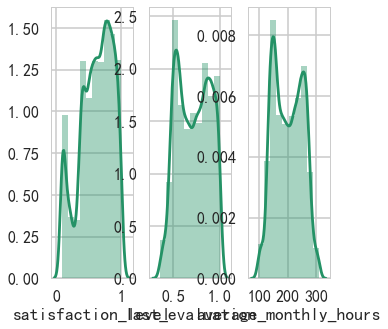

In [47]:
# 接着上面的作图
#可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
df = pd.read_csv(fname)

#使用对象思维进行画图，即一步一步来添加绘图元素
#第一步，生成一个画板对象
f = plt.figure(figsize = (5,5))
#添加子图
f.add_subplot(1,3,1) 
#界面分为 1：1列，3：3行的表格，1：取第 1 行作为第一个子图
#绘制子图一
#绘制直方图首先要去掉异常值，如空值，存在空值，则绘制会报错
df = df.dropna(how = 'any',axis = 0) #去除空值
df = df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']
#绘制直方图
#sns.distplot('DataFrame的某列数据',bins = '柱子条数',kde = '是否显示折线，默认为Ture,不显示则写False'，hist = '默认显示柱子，False不显示')
sns.distplot(df['satisfaction_level'],bins = 10)

f.add_subplot(1,3,2)#绘制子图二
sns.distplot(df['last_evaluation'],bins = 10)

f.add_subplot(1,3,3) #子图三
sns.distplot(df['average_monthly_hours'],bins = 10)
plt.show()
#观察图像，得出结论，这个很重要，所有的研究就是为了得到结论



# 箱线图:不受异常值的影响，用于发现异常值，那些在盒子上方或者下方的散点的就是异常值。

   盒图是在1977年由美国的统计学家约翰·图基(John Tukey)发明的。它由五个数值点组成：最小值(min)，下四分位数(Q1)，中位数(median)，上四分位数(Q3)，最大值(max)。也可以往盒图里面加入平均值(mean)。如上图。下四分位数、中位数、上四分位数组成一个“带有隔间的盒子”。上四分位数到最大值之间建立一条延伸线，这个延伸线成为“胡须(whisker)”。
由于现实数据中总是存在各式各样地“脏数据”，也成为“离群点”，于是为了不因这些少数的离群数据导致整体特征的偏移，将这些离群点单独汇出，而盒图中的胡须的两级修改成最小观测值与最大观测值。这里有个经验，就是最大(最小)观测值设置为与四分位数值间距离为1.5个IQR(中间四分位数极差)。即
IQR = Q3-Q1，即上四分位数与下四分位数之间的差，也就是盒子的长度。
最小观测值为min = Q1 - 1.5*IQR，如果存在离群点小于最小观测值，则胡须下限为最小观测值，离群点单独以点汇出。如果没有比最小观测值小的数，则胡须下限为最小值。
最大观测值为max = Q3 -1.5*IQR，如果存在离群点大于最大观测值，则胡须上限为最大观测值，离群点单独以点汇出。如果没有比最大观测值大的数，则胡须上限为最大值。
通过盒图，在分析数据的时候，盒图能够有效地帮助我们识别数据的特征：
直观地识别数据集中的异常值(查看离群点)。
判断数据集的数据离散程度和偏向(观察盒子的长度，上下隔间的形状，以及胡须的长度)。
1.箱体的左侧(下)边界代表第一四分位(Q1),而右侧(上)边界代表第三四分位(Q3)。至于箱体部分代表四分位距(IQR),也就是观测值的中间50%值。
2.在箱体中间的线代表的是数据的中位数值。
3.从箱体边缘延伸出去的直线称为触须(whisker).触须(whisker)的向外延伸表示了数据集中的最大和最小(异常点除外)。
4.极端值或异常点(outlier),用星号(*)来标识.如果一个值位于箱体外面(大于Q3或小于Q1),并且距离相应边界大于1.5倍的IQR,那么这个点就被认为是一个异常点(outlier)。
如果你选择通过分组变量(By variable)来分组数据,MINITAB将把图像变成垂直放置,否则图形将水平放置。
使用箱形图来评估数据的对称性：
1.如果数据是明显对称,中位数值线将近似位于四分位距箱体的中间,上下触须(whisker)在长度上将近似相等。
2.如果数据是偏态的,中位数将可能不位于四分位距(IQR)箱体的中间,某一触须(whisker)将可能显著地比另一个长。
在降水数据的箱形图(boxplot)中,中位数位于四分位距(IQR)箱体的中间,上下触须(whisker)长度相等.这表明除了异常点(outlier)星号(*)外,数据是对成的.这很好的说明了异常点(outlier)可能和其它的样本数据不是来自同一个母体(population)。

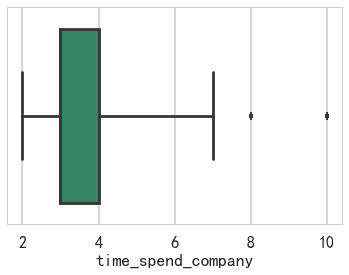

In [50]:
#接着上面的画图
#竖直箱线图，以Y轴的数据作为绘制数据，观察Y轴数据的异常
# sns.boxplot(y = df['time_spend_company'])
#横向箱线图,将观察数据赋予x就是横向观察，观察横向的时候，要把纵向注释掉才可以
sns.boxplot(x = df['time_spend_company'],saturation = 0.75,whis = 3)
plt.show()

#  折线图

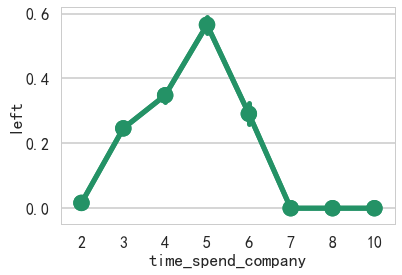

In [53]:
# 接着上面的绘图
#聚合分组函数dataframe.groupby(['要聚合的列名一','要聚合的列名二','...']) 
# groupby():将整个dataframe数据中的某几列数据聚合为一个组，即把某几列分为一个组，返回一个新的分组的DataFrame数据框，这就是分组聚合函数
sub_df = df.groupby(['time_spend_company']).mean()  #分完组后，求出每组的平均输
#将sub_df数据绘制成折线图，画法一
sns.pointplot(sub_df.index,sub_df['left']) #将在职时间与离职率绘制出来
#画法二,更简单的画法
sns.pointplot(x = 'time_spend_company',y = 'left',data = df)
plt.show()

#  饼图的绘制，由于seaborn中没有饼图的绘制，我们用matplotlib来绘制饼图

# 饼图用于分析数据的总体的结构，

# plt.pie()方法详解：

    pie(x, explode=None, labels=None,  
    colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'),  
    autopct=None, pctdistance=0.6, shadow=False,  
    labeldistance=1.1, startangle=None, radius=None,  
    counterclock=True, wedgeprops=None, textprops=None,  
    center = (0, 0), frame = False )


参数说明：

x       (每一块)的比例，如果sum(x) > 1会使用sum(x)归一化
labels  (每一块)饼图外侧显示的说明文字
explode (每一块)离开中心距离
startangle  起始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起
shadow  是否阴影
labeldistance label绘制位置,相对于半径的比例, 如<1则绘制在饼图内侧
autopct 控制饼图内百分比设置,可以使用format字符串或者format function
        '%1.1f'指小数点前后位数(没有用空格补齐)
pctdistance 类似于labeldistance,指定autopct的位置刻度
radius  控制饼图半径

返回值:
如果没有设置autopct,返回(patches, texts)
如果设置autopct,返回(patches, texts, autotexts)
patches -- list --matplotlib.patches.Wedge对象

texts autotexts -- matplotlib.text.Text对象

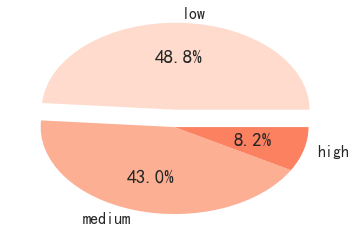

In [59]:
#直接使用matplotlib绘制
#饼图的标签
labels = df['salary'].value_counts().index
#设置要把饼图中的哪个部分 凸显出来 ，如要把低工资要凸显出来
explodes = [0.2 if i=='low' else 0 for i in labels] #选择某个模块凸显出来的方法，0.2是离开中心的距离
plt.pie(df['salary'].value_counts(normalize=True),explode = explodes,labels = labels,autopct = '%1.1f%%',colors = sns.color_palette('Reds'))
plt.show()


     以上为可视化内容，还有其他可视化视图，要根据具体情况具体使用

     使用可视化，是为了更好的发现数据的异常，特点等

     最重要的是可视化后，要发现数据的内容，要有所总结，这才是最重要的

#  接下来是探索性数据分析（多因子与复合分析），发现数据的关系，发现属性之

# 间的关系，其实就是发现，数据属性呈现什么分布，如正态分布，线性分布，

# 非线性分布等关系



# 对所有的检验都大致了解一下：

# 0. 假设检验：假设某属性与某属性的关系，然后推翻它，推不翻就是存在关系了

    假设检验步骤：
        
        1.建立原假设H1 (包含等号), H1的反命题为H2 ，H2也叫备择假设
        
        2.选择检验统计量，如：使用均值检验，使用





# 1.卡方检验：
    
    卡方值的大小可以推出p值的大小，即可以判断两种数据的关系


# 2. P 分布检验 ：
    
    检验两种数据的分布是否一样，计算出P值大小，就可看出两种数据的分布的相似程度了，P值越大，两者的分布越相似
    
    一般以  p = 0.05为界线，p>0.05这有关系，p<0.05则无关

# 3.方差检验：
    
    假设样本有m组，共n个采样
        SST =
        SSM = 
        SSE = 
    F = SSM/(m-1) /SSE/(n-m)  计算出F值就可以判断两者的关系 了
    
 # 4.相关系数检验：
 
     计算出两个数据的相关系数大小，判断两者的关系，统计学中学过了，cov,一般cov>=0.5，才认为两者有关系，即有研究的意义，若cov<0.5则两者
     
     关系不大；
     
     相关系数分为两种，一是Spearman相关系数，一般常用这个，其原理和计算与相关系数的计算大致相同
     
     
# 5.线性回归：
    
    y = ax+b,判断y与x是否有线性回归的关系，通过计算出R^2的值进行判断，R^2的值越接近1 ，则两种线性回归效果越好，反正，回归效果越差。

# 回归：确定两种或者两种以上变量之间的相互依赖的定量关系的一种统计方法。



# 6.主成分分析：

# 通过PCA算法或者SVD算法进行主成分降维分析，最后降维后得到的成分，

# 一般就是主成分，也就是剩下的主要成分为最有可能有关系的成分

    得到主成分的降维方法有奇异值分解（SVD），和PCA算法



# 各种检验的总结，除开相关系数检验、线性回归检验、主成分分析检验

# 其他的检验都是通过计算出P值大小来进行判断数据之间的关系 的


#  各种检验的代码实现

In [33]:
#  各种检验的代码实现
import numpy as np 
import scipy.stats as ss #scipy为numpy的衍生包，则处理的数据的数据格式为数组数据

#1.判断标准正态分布，进行正态性的检验
norm_dist = ss.norm.rvs(size = 20) #随机生成20个正态分布的数据样本
# norm_dist
#使用scipy.stats 下面的ss.normaltest('要判断的数据集')方法判断，数据是否符合正态分布，函数返回两个值statistic和pvalue（也就是P值）
# 我通过P值的大小判断数据是否与正态分布相同，如果P>0.05则可以视为样本数据的分布与正态分布相同

ss.normaltest(norm_dist)  #得出P值为0.408远远大于0.05

#2.卡方检验，使用ss.chi2_contingency('数据数组'),返回两个值，第二个值就是P值
ss.chi2_contingency([[15,95],[85,5]])

#3.独立分布t检验：检验两组值的均值有没有较大的差异 ，即判断两组值的独立分布性的大小，t值越大，两组数据的相关性越小
#使用ss.ttest_ind(第一组数据集,第二组数据集) 两组数据的个数大小可以不一致，返回第二个参数为P值
ss.ttest_ind(ss.norm.rvs(size = 100),ss.norm.rvs(size = 200))

# 4.方差检验
# 使用ss.f_oneway('要判断的多组数据数组') ,返回值的第二个值为P值
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

# 5.使用qq图，查看一个分布是否与另一个分布相同， 如果画出的散点图，与y=x，这条直线越吻合，则说明两个分布越相似
# qqplot默认的是使用正态分布与传入的数据进行比较
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt
# plt.show(qqplot(ss.norm.rvs(size = 100)))


# 6.相关系数检验
# 使用pandas下面的a.corr(b)方法，a为 pandas的Series或DataFrame数据a  , b为 pandas的Series或DataFrame数据b,  即可计算出a与b的相关系数
import pandas as pd
#Series数据
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
#计算s1与s2的相关系数
s1.corr(s2)
#指定使用spearman相关系数
s1.corr(s2,method = 'spearman')
#DataFrame数据,但是注意的是，使用DataFrame数据的时候要对数据进行转置才可以计算，要将数据转为np.array()类型，然后调用np.array().T 转置
df = pd.DataFrame(np.array([s1,s2]).T) #转置后构造DataFrame数据
df.corr(method = 'spearman')


# 7.线性回归检验:使用sklearn中的线性回归包进行检验
#构造加入噪声的线性数据
x = np.arange(10).astype(np.float).reshape((10,1))
#构造加入噪声数据的y
y = x*3 + 5 +np.random.random((10,1))
# y
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res = reg.fit(x,y)
y_pred = reg.predict(x)
#查看x的参数
reg.coef_
#查看截距b
reg.intercept_

# 8.PCA降维主成分，使用sklearn.decomposition下的PCA进行降维
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
#转置是为了获得两列数据，即使原来的数据有两个特征，两个成分，可以用shape方法查看数据的特征数
data.shape #shape返回的是两个值，第二个值就是这个数据的特征数
data
from sklearn.decomposition import PCA
lower_data = PCA(n_components = 1) #参数n_components = '要降成的维数' ，如 =1，即把数据降为1维数据，一个特征
#在sklearn中任何一个模型，都要将数据进行fit一下，fit过后才可以调用模型下面的方法函数
lower_data.fit(data)
#降维后的数据信息量是原来数据的多少
lower_data.explained_variance_ratio_
#获取转化后的数值
# print(lower_data.transform(data))
print(lower_data.fit_transform(data))



[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]
[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


#  接下来是复合分析：

# 包括：交叉分析、因子分析、分组与钻取、相关分析等

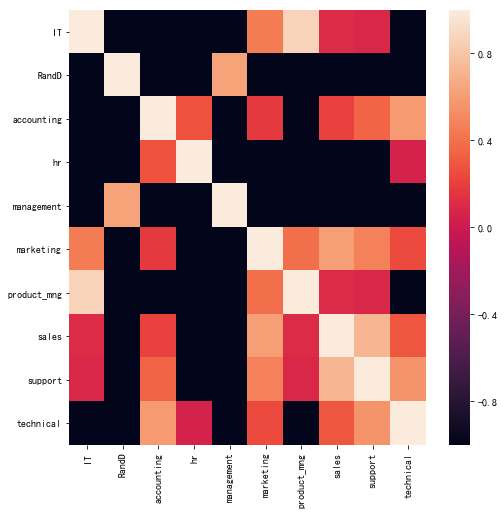

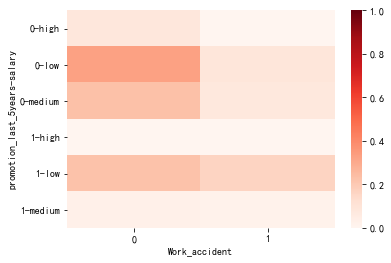

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
#调节字体大小
sns.set_context(font_scale = 1.5)
#配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
df = pd.read_excel('e:/py/数据挖掘教程二/HR.xlsx')
# df.describe()
#探究各个部门的离职率之间的是不是有明显的差异
#目的：得到各个部门的离职分布

#以department属性进行分组，即分出各个部门的各个属性的情况
# 观察HR.excel表中的department列，将部门这列的每一个具体的部门分为一个组
dp_indices = df.groupby(by = 'department').indices #返回的是包含每个部门小组的DataFrame数据的字典
# print(dp_indices)
#切片出属于left列的，并在上面的sales小组中的数据，也就是求出，部门为sales所对应的left列的值，就是sales部门的离职数
#对left列使用iloc[]进行切片，取出left列中符合iloc[]中的内容的数据 
sales_values = df['left'].iloc[dp_indices['sales']].values #销售部门的离职数
#同理，求出其他部门的离职数
technical_values = df['left'].iloc[dp_indices['technical']].values #科技部门的离职数
#使用t检验，求解出销售部门的离职数据的分布于科技部门的离职的数据分布的P值，然后通过P值大小，判断这两个部门的离职分布是否相似
#使用ss.ttest_ind()方法
# print(ss.ttest_ind(sales_values,technical_values)[1])

#怎么两两求他们的P值，即求出所有部门的每两个之间的P值
dp_keys = list(dp_indices.keys())
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)]) #构造一个二维数组，用来遍历所有部门，求出并存储两两部门之间的P值
#使用遍历
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05: #判断如果两者的P值小于0.05的（即两者离职分布有显著差异），我们赋值为-1，使格子显示的颜色最深，更容易看出来
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
plt.figure(figsize=(8,8))
#绘制热力图 ，就是查看两两部门之间的P值的图，由X*Y个格子组成，每个格子的颜色深浅表示每两个属性之间的p值大小，
# 如第一个格子为(X1,Y1)的颜色的深浅对应的值表示X1属性与Y1属性的P值大小
sns.heatmap(dp_t_mat,xticklabels = dp_keys,yticklabels = dp_keys)
plt.show()                                                                                               

#查看数据透视表
# 使用pandas下面的pd.pivot_table('总体数据框',values = '要透视的列',index = ['要透视的其他列一','其他列二','....']，column = [''],aggfunc = '数据透视使用的方法')
piv_tb = pd.pivot_table(df,values = 'left',index = ['promotion_last_5years','salary'],columns = ['Work_accident'],aggfunc = np.mean)
#将透视表可视化，利用searborn中的热力图，将透视表可视化,颜色越深离职率越高，越要关注
sns.heatmap(piv_tb,vmin =0,vmax = 1,cmap = sns.color_palette('Reds',n_colors = 256))
plt.show()


# 分组：分组采用的方法就是使用钻取

# 钻取就是改变维度的层次，变换分析的粒度，详细查看百度什么是钻取

# 要区分什么是向下钻取和向上钻取

# 向下钻取：
    
    就是展开数据，查看数据的详细内容的过程就叫做向下钻取
    如：知道每个班的总成绩，我要知道男生和女生的成绩或者知道每一科的平均成绩等，这都是向下钻取的操作

# 向上钻取：
     
     就是与向下钻取的反向相反，汇总数据的过程，如：知道班上男女生的成绩，我要知道全部的总成绩，这就是向上钻取汇总的操作

#  分组分析：将数据分组后进行分析，有自动分组的方法，在后面会学到，聚类和k-mean的机器学习的自动分组算法

# 

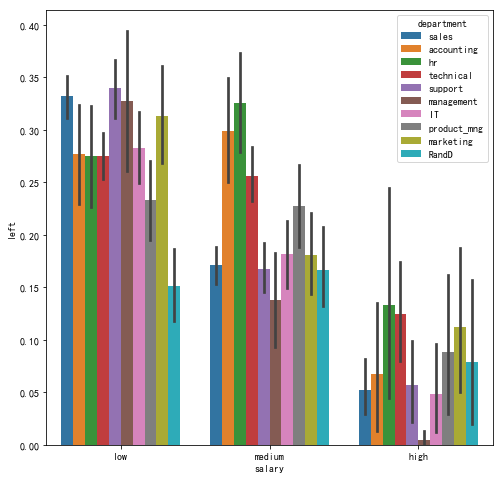

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
#调节字体大小
sns.set_context(font_scale = 2.5)
#设置画板大小
plt.figure(figsize = (8,8))
#配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
df = pd.read_excel('e:/py/数据挖掘教程二/HR.xlsx')
# df.describe()

#直接绘制柱状图查看分组情况
#如查看。工资与离职的关系柱状图,同时设置向下钻取为部门，则柱状图可以看到每个部门的离职率情况
sns.barplot(x = 'salary',y = 'left',hue = 'department',data = df)
sns.set_context(font_scale = 2)
plt.show()

#查看连续值的分组分布

# s1_s = df['satisfaction_level']
# #sns.barplot(x,y) x,y数据为列表数据或数组数据

# sns.barplot(list(range(len(s1_s))),s1_s.sort_values())
plt.show()

# 相关分析：分析两组样本，相关趋势或者分布趋势是否相关的分析方法

# 1.连续数据的相关分析的方法：

    1.相关系数
    
# 2.离散数据的相关分析的方法：

    二分类离散数据的相关分析方法：
    
    1.如果是二分类的离散数据的相关分析，我们可以使用pearman相关系数进行分析
    
    2.二分类离散数据的相关分析，也可以使用gini系数进行分析
    
    多分类离散数据的相关分析方法：
    
    我们可以使用信息熵来对多分类离散数据进行相关性分析，详细请看https://blog.csdn.net/u012351768/article/details/73469813
    1.自信息：
    2.熵(信息熵)：
        信息熵是用来评估样本集合的纯度的一个参数，就是说，给出一个样本集合，这个样本集合中的样本可能属于好多不同的类别，也可能只属于一个类别，那么如果属于好多不同的类别的话，我们就说这个样本是不纯的，如果只属于一个类别，那么，我们就说这个样本是纯洁的。 而信息熵这个东西就是来计算一个样本集合中的数据是纯洁的还是不纯洁的。下面上公式： 

    
    3.条件熵：
       条件熵是另一个变量Y熵对X（条件）的期望。https://zhuanlan.zhihu.com/p/26551798
       其实条件熵意思是按一个新的变量的每个值对原变量进行分类，比如上面这个题把嫁与不嫁按帅，不帅分成了俩类。
       然后在每一个小类里面，都计算一个小熵，然后每一个小熵乘以各个类别的概率，然后求和。
     我们用另一个变量对原变量分类后，原变量的不确定性就会减小了，因为新增了Y的信息，可以感受一下。不确定程度减少了多少就是信息的增益。
    4.互信息（熵增益）
    信息增益：简单来说就是 熵增益 = 信息熵 - 条件熵
    信息增益代表了在一个条件下，信息复杂度（不确定性）减少的程度。
    那么我们现在也很好理解了，在决策树算法中，我们的关键就是每次选择一个特征，特征有多个，那么到底按照什么标准来选择哪一个特征。
    这个问题就可以用信息增益来度量。如果选择一个特征后，信息增益最大（信息不确定性减少的程度最大），那么我们就选取这个特征。
    通过计算各个特征的信息增益发现，身高的信息增益最大，也就是：身高这个特征对于我们广大女生同学来说，决定嫁不嫁给自己的男朋友是很重要的。那么我就可以说，孟非哥哥，我想知道男嘉宾的一个特征是身高特征。因为它在这些特征中，身高对于我挑夫君是最重要的，信息增益是最大的，知道了这个特征，嫁与不嫁的不确定度减少的是最多的。
    5.gini系数：用来衡量数据的纯度，即判断数据是不是纯数据，与信息熵的概念差不多
    
    
    
# 这是其他人解释的概念


    在信息论与概率统计学中，熵（entropy）是一个很重要的概念。在机器学习与特征工程中，熵的概念也用得灰常多。今天就把跟熵有关的东东稍微整理一下，权当笔记。
1.信息熵
熵是神马东东？信息论的开山祖师爷Shannon（中文翻译过来一般叫香农，总觉得很多文字经过翻译就不对劲，就跟人家老外翻译贱人就是矫情一样，感觉怪怪的。所以咱们还是用英文了，偷偷装个小逼）明确告诉我们，信息的不确定性可以用熵来表示： 
对于一个取有限个值的随机变量X，如果其概率分布为： 
P(X=xi)=pi,i=1,2,⋯,n

那么随机变量X的熵可以用以下公式描述： 
H(X)=−∑(i=1,n)pi*log*pi     #这里的(i=1,n)的意思是累加和从i=1开始累加，累加到i=n
每次看到这个式子，都会从心底里感叹数学的伟大与奇妙。在这之前，信息这东东对于人们来说，是个看着好像挺清晰实际还是很模糊的概念。Shannon用最简洁美妙的方式，告诉了整个世界信息到底应该怎么去衡量去计算。今天每个互联网人都知道，这个衡量的标准就是bit。正是由于bit的出现，才引领了我们今天信息时代的到来。所以即使把Shannon跟世界上最伟大的那些科学家相提并论，我觉得也丝毫不为过。

举个例子，如果一个分类系统中，类别的标识是c，取值情况是c1,c2,⋯,cn，n为类别的总数。那么此分类系统的熵为： 
H(c)=−∑(i=1,n)p(ci)*log2p(ci)  #log2 相当于2为底的对数

更特别一点，如果是个二分类系统，那么此系统的熵为： 
H(c)=p(c0)*log2p(c0)+p(c1)*log2p(c1)

其中p(c0)、p(c1)分别为正负样本出现的概率。
2.条件熵(Conditional Entropy)与信息增益（Information Gain）
第一节我们谈到，信息的不确定性我们用熵来进行描述。很多时候，我们渴望不确定性，渴望明天又是新的一天，希望寻找新的刺激与冒险，所谓的七年之庠就是最好的例子。但是又有很多时候，我们也讨厌不确定性，比如现在的RTB广告，很多时候广告主其实希望不管什么情况下，这个广告位都是归我所有来投广告，别人都别跟我来抢，我把广告素材准备好以后，媒体按排期给我播就行了。所以在这种情况下，我们又要竭力去消除系统的不确定性。

那怎么样去消除系统的不确定性呢？当我们知道的信息越多的时候，自然随机事件的不确定性就越小。举个简单的例子： 
如果投掷一枚均匀的筛子，那么筛子出现1-6的概率是相等的，此时，整个系统的熵可以表述为：
H(c)=−1/6log21/6×6=log26

如果我们加一个特征，告诉你掷筛子的结果出来是偶数，因为掷筛子出来为偶数的结果只可能为2,4,6，那么此时系统的熵为: 
H(c)=−1/3log21/3×3=log23
因为我们加了一个特征x：结果为偶数，所以整个系统的熵减小，不确定性降低。

来看下条件熵的表达式： 
1.当特征x被固定为值xi时，条件熵为: H(c|x=xi) 
2.当特征X的整体分布情况被固定时，条件熵为:H(c|X) 
应该不难看出： 
H(c|X)=−p(x=x1)H(c|x=x1)−p(x=x2)H(c|x=x2)−⋯−p(x=xn)H(c|x=xn)=−∑(i=1,n)p(x=xi)H(c|x=xi)=−∑(i=1,n)p(x=xi)p(c|x=xi)log2p(c|x=xi)=−∑(i=1,n)p(c,xi)log2p(c|x=xi)
其中，n为特征X所出现所有种类的数量。

那么因为特征X被固定以后，给系统带来的增益(或者说为系统减小的不确定度)为： 
IG(X)=H(c)−H(c|X)=−∑(i=1,n)p(ci)*log2p(ci)+∑(i=1,n)p(x=xi)*H(c|x=xi)
举个别人文章中例子：文本分类系统中的特征X,那么X有几个可能的值呢？注意X是一个固定的特征，比如关键词”经济”，当我们说特征”经济”可能的取值时，实际上只有两个，要么出现，要么不出现。假设x代表x出现，而x¯表示x不出现。注意系统包含x但x不出现与系统根本不包含x可是两回事。 
因此固定X时系统的条件熵为： 
H(C|X)=−p(x)*H(c|x)−p(x¯)*H(C|x¯)
特征X给系统带来的信息增益(IG)为： 
IG(X)=H(c)−H(c|X)=−∑(i=1,n)p(ci)*log2p(ci)+p(x)*∑(i=1,n)p(ci|x)*log2p(ci|x)+p(x¯)*∑(i=1,n)p(ci|x¯)*log2p(ci|x¯)
式子看上去很长，其实计算起来很简单，都是一些count的操作。−∑(i=1,n)p(ci)log2p(ci)这一项不用多说，就是统计各个类别的概率，将每个类别的样本数量除以总样本量即可。p(x)∑(i=1,n)p(ci|x)log2p(ci|x)这一项，p(x)表示特征在样本中出现的概率，将特征出现的次数除以样本总量即可。p(ci|x)表示特征出现的情况下，每个类别的概率分别为多少，也全是count操作。p(ci|x¯)操作以此类推。

3.信息增益做特征选择的优缺点
先来说说优点： 
1.信息增益考虑了特征出现与不出现的两种情况，比较全面，一般而言效果不错。 
2.使用了所有样例的统计属性，减小了对噪声的敏感度。 
3.容易理解，计算简单。

主要的缺陷： 
1.信息增益考察的是特征对整个系统的贡献，没有到具体的类别上，所以一般只能用来做全局的特征选择，而没法针对单个类别做特征选择。 
2.只能处理连续型的属性值，没法处理连续值的特征。 
3.算法天生偏向选择分支多的属性，容易导致overfitting。

4.信息增益比(Infomation Gain Ratio)
前面提到，信息增益的一个大问题就是偏向选择分支多的属性导致overfitting，那么我们能想到的解决办法自然就是对分支过多的情况进行惩罚(penalty)了。于是我们有了信息增益比，或者说信息增益率： 
特征X的熵： 
H(X)=−∑(i=1,n)pi*log2pi

特征X的信息增益 ： 
IG(X)=H(c)−H(c|X)

那么信息增益比为： 
gr=H(c)−H(c|X)H(X)
在决策树算法中，ID3使用信息增益，c4.5使用信息增益比。

5.Gini系数
Gini系数是一种与信息熵类似的做特征选择的方式，可以用来数据的不纯度。在CART(Classification and Regression Tree)算法中利用基尼指数构造二叉决策树。 
Gini系数的计算方式如下： 
Gini(D)=1−∑(i=1,n)pi^2

其中，D表示数据集全体样本，pi表示每种类别出现的概率。取个极端情况，如果数据集中所有的样本都为同一类，那么有p0=1，Gini(D)=0，显然此时数据的不纯度最低。 
与信息增益类似，我们可以计算如下表达式： 
ΔGini(X)=Gini(D)−GiniX(D)

上面式子表述的意思就是，加入特征X以后，数据不纯度减小的程度。很明显，在做特征选择的时候，我们可以取ΔGini(X)最大的那个
        
    
    

In [26]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
# #调节字体大小
# sns.set_context(font_scale = 2.5)
# #设置画板大小
# plt.figure(figsize = (8,8))
# #配置matplotlib画图的符号
# plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
# plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
# df = pd.read_excel('e:/py/数据挖掘教程二/HR.xlsx')
# #连续性数据的相关性分析
# #计算整张DataFrame表的相关系数,并绘制成热力图形式展现出来
# # 相关系数越接近于+1的两者相关性越好，接近于0的为无关，接近于-1的为负相关
# sns.heatmap(df.corr(),vmin = -1,vmax = 1,cmap = sns.color_palette('RdBu',n_colors = 128))
# # #从热力图可以看出，越接近与-1的红色越深，可以发现满意度越高离职率越低，离职率越高，满意度越低
# plt.show()

#离散性数据的相关性分析

s1 = pd.Series(['X1','X1','X2','X2','X2','X2'])
s2 = pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])
#定义计算熵的方法
def getEntropy(s):
    #对传入的参数s进行判断，因为s参数的数据格式是pandas的Series格式，如果不是这个格式，我们要转为这个格式
    # isinstance('要判断的对象',类型) 函数来判断一个对象是否是一个已知的类型
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = pd.groupby(s,by = s).value_counts()/float(len(s))#value_counts()是计算pandas中为Series类型数据的相同的数值的个数的计数方法
    return -(np.log2(prt_ary)*prt_ary).sum()
#输出计算出的信息熵的值
print('Entropy',getEntropy(s1))
print('Entropy',getEntropy(s2))

#定义条件熵计算方法
def getCondEntropy(s1,s2):
    d = dict()
    for i in list(range(len(s1))):#s1与s2的长度相同
        d[s1[i]] = d.get(s1[i],[])+[s2[i]]
        #get()函数返回字典指定键的值，如果值不在字典里返回定义的默认值。dict.get(key, default=None)
        #key -- 字典中要查找的键。default -- 如果指定键的值不存在时，返回该默认值值。如果值不在字典中返回默认值 None。
    
    #返回条件熵的值
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d]) #遍历d中的值，并进行计算后，对返回的列表值求和得到条件熵的值
print('CondEntropy',getCondEntropy(s1,s2))
print('CondEntropy',getCondEntropy(s2,s1))

#定义熵增益（互信息）计算方法
def getEntropyGain(s1,s2):
#     简单来说就是 熵增益 = 信息熵 - 条件熵
    return getEntropy(s2)-getCondEntropy(s1,s2)
print('EntropyGain',getEntropyGain(s2,s1))
print('EntropyGain',getEntropyGain(s1,s2))

#增益率的计算方法
def getEntropyGainRatio(s1,s2):
#     增益率 = 熵增益 / 信息熵
    return getEntropyGain(s1,s2)/getEntropy(s2)
print('EntropyGainRatio',getEntropyGainRatio(s1,s2))
print('EntropyGainRatio',getEntropyGainRatio(s2,s1))

#熵相关的计算方法
#计算离散值的相关性方法，如计算s1与s2的相关性大小，1为完全正相关，-1为完成负相关
import math #引入数学包求开方
def getDiscreteCorr(s1,s2):
    #计算公式为：离散数据s1与s2的相关性大小为： s1与s2的熵增益 / (s1与s2的信息熵的值的乘积的开发)
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
print('DiscreteCorr',getDiscreteCorr(s1,s2))
print('DiscreteCorr',getDiscreteCorr(s2,s1))

#gini系数计算方法,计算方法与信息熵相似，只是最后计算返回的是平方和
#计算gini系数需要定义两个方法
#1.获取信息值
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = pd.groupby(s,by = s).value_counts()/float(len(s))
    return sum(prt_ary**2)
#2.计算gini系数
def getGini(s1,s2):
    d = dict()
    for i in list(range(len(s1))): #s1与s2的长度相同
        d[s1[i]] = d.get(s1[i],[])+ [s2[i]]
    #返回值计算与信息熵不同
    return 1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d ])
print('Gini',getGini(s1,s2)) 
print('Gini',getGini(s2,s1))        




Entropy 0.9182958340544896
Entropy 1.0
CondEntropy 0.5408520829727552
CondEntropy 0.4591479170272448
EntropyGain 0.4591479170272448
EntropyGain 0.4591479170272448
EntropyGainRatio 0.4591479170272448
EntropyGainRatio 0.5
DiscreteCorr 0.4791387674918639
DiscreteCorr 0.4791387674918639
Gini 0.25
Gini 0.2222222222222222


e:\studypython\study\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
e:\studypython\study\lib\site-packages\ipykernel_launcher.py:78: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods


# 因子分析（成分分析）：就是从多个属性变量中，分析共性相关因子的方法，因子又叫做属性

    因子分析有两种：
    
       1.探索性因子分析 ：方法有 主成分分析
       
       2.验证性因子分析： 相关分析，卡方检验，回归分析，熵，P值等等，上面所学的验证性假设都是
       
    

Ratio [9.98565340e-01 8.69246970e-04 4.73865973e-04 4.96932182e-05
 2.43172315e-05 9.29496619e-06 8.24128218e-06]


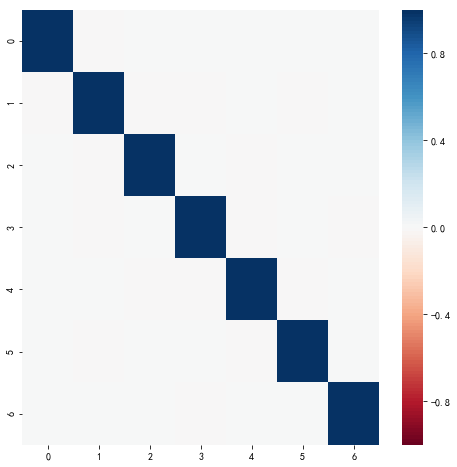

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
# #调节字体大小
sns.set_context(font_scale = 2.5)
# #设置画板大小
plt.figure(figsize = (8,8))
# #配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号
df = pd.read_excel('e:/py/数据挖掘教程二/HR.xlsx')

#主成分分析 PCA ,注意：使用PCA进行主成分分析时，处理的数据要为连续型数据，不是连续性的数据要去除掉
from sklearn.decomposition import PCA
my_pca = PCA(n_components = 7)
lower_mat = my_pca.fit_transform(df.drop(labels = ['salary','department','left'],axis = 1)) #去除10列数据中3列不连续的数据列
print('Ratio',my_pca.explained_variance_ratio_) #查看7个成分中每个成分的重要性比例
#求出各个成分之间的相关系数，并绘热力图
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmin = -1,vmax = 1,cmap =sns.color_palette('RdBu',n_colors = 128))
plt.show()


#  各种分析总结 ：每种不同的数据类型间的分析，对应使用不同的分析方法

    1. 连续型数据与连续型数据间的分析 -----> 可用方法，相关系数、假设检验
    
    2.连续型 与 离散型（二值） -------> 相关系数、连续二值法（最下Gini切分，最大熵增益切分）
    
    3.连续型 与 离散型 （非二值）  --------> 相关系数（定序）
    
    4.离散型（二值） 与 离散型（二值） -------> 相关系数、熵相关、F分值
    
    5.离散型 与 离散型（非二值） -------->熵相关、Gini、相关系数（定序）


# 学完各种分析后，探索性数据分析就已经学完了，这是机器学习与数据挖掘的前传，为下面的机器学习和数据挖掘做好基础。

# 特征工程（数据的预处理）：

    什么是数据的特征？ 数据的特征就是可以反映该数据的特性的东西，就是该数据与其他数据不同的地方就是该数据的特征。
    特征工程的主要步骤有：
    1.特征使用：数据的选择，数据的采集（获取），数据的可用性
    2.特征获取 ：数据特征的来源，特征的存储
    3.特征处理：数据的清洗，特征的预处理
    4.特征监控 ： 对现有特征的监控、对新特征的监控

# 对数据进行的预处理，只有先对数据进行预处理，才可以更好的使用

# 数据挖掘或机器学习的模型，数据的质量与数量对模型的效果有很大的关系，只有

# 好的数据才可以更好的体现模型的效果。故数据的预处理非常重要！


#  数据的清洗：（在特征选取前，要对数据进行清洗）

    1.数据样本的采集（抽样）：当数据过大或者不可能获取全量数据的时，就需要使用抽样的方法对测试数据进行获取；如灯泡的寿命，就需要抽样；
    抽样都样本的要求有： 1、样本要具备代表性；2、样本比例要平衡 3、尽量考虑使用全量数据（更准确），使用大数据框架
    
    2.异常值（空值）的处理：这里对异常值的处理，主要为丢弃，删除或者代替
       异常值处理方法：
       1、识别异常值和重复值：
       使用pandas下面的 isnull() #判断是否为空值，为空值返回True，否返回False；
       使用pandas下的duplicated()#判断是否为重复值，为重复值返回True，否返回False；
       若数据在下四分位数（0.25）与上四分位数（0.75）边界之外的数据则可认为是异常数据，可使用箱线图表示出来
       2、对异常值的处理
       去掉空值：pandas: drop()或dropna() ; 去掉重复值：pandas：drop_duplicated();
       把异常值当成是新的属性值：pandas ：fillna(); 使用集中值（中位数或平均输）代替：pandas：fillna()
       使用边界值替代：pandas: fillna()
       
       

In [20]:
#数据清洗例子
import pandas as pd
#构造一个DataFrame数据，
df = pd.DataFrame({
    'A':['a0','a1','a1','a2','a3','a4'],
    'B':['b0','b1','b2','b2','b3',None],
    'C':[1,2,None,3,4,5],
    'D':[0.1,10.2,11.4,8.9,9.1,12],
    'E':[10,19,32,25,8,None],
    'F':['f0','f1','g2','f3','f4','f5'],
})
#df 查看数据，数值型的空值在DataFrame中显示为NaN，而字符型的空值在DataFrame中显示为None
# 以下操作都不会改变df，只是生成一个新的DataFrame数据
#查看数据的空值
df.isnull()
#去掉空值
df.dropna()
#去掉指定列的空值
df.dropna(subset=['B']) #去掉B列中的空值
#识别重复值
df.duplicated(['A']) #查看A列的重复值
df.duplicated(['A','B']) #查看A、B列的重复值，只有当这两列的同一行都出现重复值的时候，才返回Ture，其他返回False
#去除重复值
df.drop_duplicates(['A']) #去掉A列中的重复值
df.drop_duplicates(['A'],keep = 'first')  #保留重复值的第一行，其他去掉
#替换异常值
df.fillna('*') #将异常值空值用*来替换
#使用均值，中位数对异常值进行替代
df.fillna(df['E'].mean()) #使用E列的平均值替代空值
#使用插值法对空值进行替代，插值法有拉格朗日插值法、牛顿插值法等
#插值法只能对Series进行操作，不能对DataFrame进行操作
df['E'].interpolate()
#插值原理,返回该值左右两边的平均值
pd.Series([1,None,4,5,20]).interpolate() #None位置插入的值为 = （4+1）/2 =2.5
#指定插值方法进行插值
df['E'].interpolate(method = 'spline',order = 3)

#使用下四分位数（0.25）与上四分位数（0.75）的边界值对异常值进行替换
upper_q = df['D'].quantile(0.75) #获得D列的上四分位数
lower_q = df['D'].quantile(0.25) #获取下四分位数
q_int = upper_q - lower_q #上四分位数与下四分位数的差值
k = 1.5 #设置k值，就是允许大于边界值的倍数，如边界值为3，则认定大于 3+ -1.5*（上下四分位数的差值）的为异常值
#去掉异常值
#DataFrame的条件运算 DataFrame[条件一][条件二][条件三][...]
df[df['D']>lower_q - k*q_int][df['D']<upper_q+k*q_int] #取出在异常边界中的正常值

#去掉异常的字符数据，如F列的g2 为异常值
# 1.直接去掉异常的行
df.drop(2) #直接去掉g2所在的行

# 2.使用条件判断去掉，使用startswith('字符的开头字符')方法判断某字符串的开头是否符合条件，是则返回True，否返回False
df[[True if item.startswith('f') else False for item in list(df['F'].values)]]


e:\studypython\study\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,f1
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


# 数据清洗完成后才对数据的特征进行处理、选择、提取

# 特征又叫属性，属性又叫特征

#  特征预处理，对数据的特征进行预处理，使数据的特征更明显

# 第一步首先要根据研究的内容找出数据集的标注（又叫标签，label），找出标签后，其他的列可以认为是该标签的属性（特征）了。

# 即首先要区分数据集中谁是label（标签），谁是属性，一般要根据研究内容来区分，属性是为标签服务的，所有的属性，只为了反映标签，可以说标签是Y，属性是X,X可以有多个，但是标签Y一般一类就只有一个标签

# 如在HR数据中，如果要研究left离职率，则其他的列均可以看成是left的属性，分好谁是属性，谁是标签后就可以进行数据挖掘了，如探究哪个属性对标签的影响最大等。

#  标签的确定不需要打代码，只需要根据研究的要求，人为的设定便可。

# 特征预处理（在区分好标签之后）：
# 每个特征（在DataFrame中）的数据集都是由这一列的数据组成，而每个特征的数据集中的每个数据的值的大小都不同，有的甚至差距很大。为了能使数据挖掘或机器学习模型更好的学习，我们要在提取该属性的数据的特征之前，在保证每个的数据集的特征不变的情况下，对数据的值的大小进行规范化。这就是特征的预处理。特征的预处理的好坏直接影响到模型的效果。


# 特征预处理（包括特征的选择）的方法有：

    1.特征的选择（在区分好标签之后进行）：剔除与标签不相关或者冗余的特征
    对于特征的选择，主要有三种思想。1、过滤思想：sklearn中给出PCA主成分分析的方法对数据进行降维，从而获取到最主要的特征；但是对于主特征的选择是否最佳，还是要人为进行判断运用模型进行检验，有时候机器的算法也会出现问题，从而造成效果不理想的情况。2、包裹思想：把所有的特征放在一个集合中，然后这个集合中又分为多个特征子集，我们使用遍历的方式，遍历取出所有的特征子集并使用模型对遍历出的特征子集进行测试，最后得出效果最优的特征子集，则可以把这个子集作为特征预处理后的特征了。如RFE算法等；3、嵌入思想：即将数据进行正规化，把数据正规化后得到的数据就是特征预处理后的特征了，但是正规化也有缺点就是容易把主要特征去除掉，我们还是要进行检验。
    
    2.特征的变换（在特征选择之后进行）：简单来说就是在保证原数据的特征不变的情况下将原特征的数据的数值进行变换，使原特征的数据的数值大小差距不是巨大，使模型能够更好的进行训练。 特征的变换是使用模型的前提，在使用模型前，一般一定要进行特征的变换。特征变换的方法主要有：对指化、离散化、数据平滑、归一化（标准化）、数值化、正规化（各种方法的详细介绍在data2.py和莫烦的sklearn中有讲解，这里在例子中简单说明一下） 
    3.特征降维(在特征的变换之后进行)：简单来说就是对特征的维度降低。主要的方法有PCA降维算法和LDA降维算法
    4.特征衍生（在特征变换之后进行）：特征衍生就是在原来的数据集的构造出新的数据属性特征列；如在原来的时间数据中我们可以衍生出时间差这一个新的属性特征；又或者在商品数据中我们可以衍生出价评比（价评比=价格/评论数）这一新特征等；特征的衍生有时候对数据的探索会有新的更大的意义；特征衍生的方法主要有：1、两两特征数据之间进行加减乘除得出新特征。2、求导与高阶求导得出性特征。3、人工归纳出的新特征。特征衍生就不举例了。
    

In [9]:
#1.特征的选择，举例说明
import numpy as np 
import pandas as pd 
import scipy.stats as ss
df = pd.DataFrame({'A':ss.norm.rvs(size = 10),'B':ss.norm.rvs(size = 10),'C':ss.norm.rvs(size = 10),'D':np.random.randint(low =0,high =2,size = 10)})
df
#导入特征测试的模型
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#在数据中选择标签（标注）
Y = df.loc[:,'D'] #选择D列作为标签设为Y，则其他的列可以认为是其特征X
X = df.loc[:,['A','B','C']] #选择Ａ，Ｂ，Ｃ列作为特征
#特征的选择的算法全部封装在sklearn中
from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel  #导入三种不同思想的特征选择的算法


#过滤思想的特征选择,使用SelectKBest算法
skb = SelectKBest(k=2) #取两个特征
#对数据进行拟合训练(找出数据的规则)
skb.fit(X,Y)
#fit()后，便可以使用transform()把数据转为机器训练时的数据格式,
#查看经过特征选择后的X的数据
skb.transform(X) #查看X转换后的数据，可以看出，X由原来的三列转为了两列，即把最不相关的那一列去掉了，完成了特征的选择


#包裹思想的特征选择，使用RFE()算法
ref = RFE(estimator = SVR(kernel = 'linear'),n_features_to_select = 2,step =1) #选择保留 2 个特征
#fit()+transform() 是否等于 fit_transform(),发现两者基本相同。
# ref.fit(X,Y)
# ref.transform(X)
ref.fit_transform(X,Y)


#嵌入思想的特征选择，使用SelectFromModle算法
sfm = SelectFromModel(estimator = DecisionTreeRegressor(),threshold = 0.1)  #0.1是阈值，设得越高，去掉的成分越多，设置得越低，去掉的成分越少
sfm.fit_transform(X,Y)


array([[-0.57871277, -0.0602602 ],
       [ 0.81081009,  0.0342613 ],
       [-1.36169639, -1.26807045],
       [ 0.97002052,  0.62285366],
       [ 0.33343412, -0.86055461],
       [ 0.43831934,  1.07743287],
       [-0.25968456,  1.54890238],
       [ 1.11394941,  1.39854642],
       [ 0.48709248,  0.193434  ],
       [-0.59199983, -0.21261611]])

In [36]:
#2.特征的变换，举例说明
import numpy as np
import pandas as pd
#1.特征变换---->>数据离散化（数据分箱），分箱指的是把数据分成多个集合（箱子）,然后每个集合使用一个数据代表这个集合的特征（一般使用集合的均值）
#数据分箱又分为等频(等深)分箱和等宽分箱
lst = [6,8,10,15,16,24,25,40,67]
#等频分箱（就是每个箱子数据个数一样的分箱）
#使用pd.qcut(分箱数据,q = 多少个分为一箱)
pd.qcut(lst,q = 3)
pd.qcut(lst,q = 3,labels = ['low','medium','high']) #用labels来区分每个箱子的数据内容

#等宽分箱，pd.cut(分箱数据,bins = '分成多少段')
pd.cut(lst,bins = 3,labels = ['low','medium','high'])

#2.特征变换----->数据归一化与数据标准化（算法全部封装在sklearn.preprocessing中）
#归一化（使数据值压缩到0-1的范围内），使用MinMaxScale算法，
#标准化，另一种数据压缩的方法，全部转为均值为0，方差为1的数据，使用StandardScale算法
from sklearn.preprocessing import MinMaxScaler,StandardScaler
a = np.array([1,4,10,15,21])
#归一化
mm = MinMaxScaler()
#mm.fit_transform()和mm.fit()+mm.transform()效果是相同的
# mm.fit_transform(a.reshape(-1,1)) 
# reshape(-1,1)：是因为 MinMaxScaler是对行数据进行处理的，且只对一列的数据进行处理
#sklearn中的特征转换中原始数据都要reshape(-1,1)一下才可以使用fit(),因为sklearn中对特征数据的处理都是对行处理的
mm.fit(a.reshape(-1,1))
mm.transform(a.reshape(-1,1))

#标准化
b = np.array([1,1,1,1,0,0,0,0])
c = np.array([1,0,0,0,0,0,0,0])
sd = StandardScaler()
sd.fit_transform(b.reshape(-1,1))
sd.fit_transform(c.reshape(-1,1))

#3.特征变换---->数值化，就是把非数值的数据转化为数值数据的过程。数据一般可分为4类：定类数据、定序数据、定距数据、定比数据
#其中定类数据和定序数据需要进行数值化处理后，模型才可以运算；定距数据要进行归一化处理；
#数值化的变换方法有： 数值化---->标签化(LabelEncoder)（将非数值数据转为0或1来表示，一般用于定序数据的处理如：瘦为1，胖为0）；
# 数值化----->独热编码（One-Hot Encode）:用于多类定类数据的数值化，将定类数据转为由0和1构成的向量表示，如：颜色red用[1,0,0,0]表示，
# green:[0,1,0,0],blue:[0,0,1,0]等，但是注意的是在进行独热编码前，首先要对数值进行标签化处理，然后才可以进行独热编码
#还有最后的一种方法是：人工自己转换方法，如我们自己定义方法，转换更灵活，把值为'高'的用 数字 1表示，‘矮’用数字 0来表示
from sklearn.preprocessing import LabelEncoder,OneHotEncoder  #两种数值化方法都封装在sklearn.preprocessing中
d = np.array(['Down','Up','Up','Down']) #定义定序数据
dd = np.array(['Low','Medium','High','Medium','Low'])
#标签化
LE = LabelEncoder()
#sklearn中的特征转换中原始数据都要reshape(-1,1)一下才可以使用fit(),因为sklearn中对特征数据的处理都是对行处理的
LE.fit_transform(d.reshape(-1,1)) 
LE.fit_transform(dd.reshape(-1,1))

#独热编码 ，在对数据进行独热编码前要对数据进行数值的标签化，即先进行LabelEncoder, 
# 独热编码返回的是一个稀疏矩阵，可以使用toarray()方法转为数组形式并查看
e = np.array(['Red','Yellow','Blue','Green'])
lb_encoder = LabelEncoder()
#将原数据进行标签化，并存在新变量中
#DataConversionWarning: A column-vector y was passed when a 1d array was expected.,
# 当报出这个警告时，意思是说在LabelEncoder()模型中要fit()的数据不需要reshape也可以,但是如果在其他模型中报错，则对数据就需要reshape
lb_trans = lb_encoder.fit_transform(e) #所以，这里的e数据我们不进行reshape
#创建独热编码对象
oht_encoder = OneHotEncoder()
oht_encoder.fit(lb_trans.reshape(-1,1))  #而在OneHotEncoder模型中对数据进行fit()前需要reshape，故我们要对数据进行reshaper(-1,1)
#创建一个要独热编码的新数据
ee = np.array(['Yellow','Blue','Green','Green','Red'])
#先对ee进行标签化转化
ee2 = lb_encoder.transform(ee)
oht_encoder.transform(ee2.reshape(-1,1)).toarray() #由于独热编码返回的稀疏矩阵，需要使用toarray()方法转为数组后查看


#4.特征变换---->正规化（规范化），有两种正规化公式：L1正规化 和 L2正规化
# 正规化用于：1、直接用在特征上（很少用）2、用于每个对象的各个特征的表示（使用在特征矩阵的行上）（常用）
# 3、用于模型的参数上（回归模型使用较多）
from sklearn.preprocessing import Normalizer
f = np.array([[1,1,3,-1,2]]) #在原数据的基础上加多一个分号，如[原数据]，就可以把原数据转为只有1行 n列的形式了，而正规化只处理这样的数据
nl = Normalizer(norm = 'l1') #指定正规化方法为L1方法
nl2 = Normalizer(norm = 'l2')
#由于正规化是对数据的一行进行的，故要把原数据转为只有一行的形式
# print(f.shape) #查看f数据是否是(1,n)的形式,
nl.fit_transform(f)
nl2.fit_transform(f)

e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\studypython\study\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.25,  0.25,  0.75, -0.25,  0.5 ]])

In [34]:
#reshape(-1,1)的作用，把原来数据构造成一个(行数=原来数据的个数，列数= 1)的矩阵，也可以说是把原来数据中的每个数据转为每一行数据（数据转为行）
#shape方法返回的是一个矩阵的行数与列数（行数，列数）
# 而在数据挖掘与机器学习中我们一般把列数看成是该矩阵数据的特征数, 
# 而且在sklearn的中的特征工程中的特征转换的方法中，都是对行进行处理的，则就要把原来的数据reshape(-1,1)一下，才可以使用fit()方法
import numpy as np
a = np.array([2,5,6,8])
b = np.array([[2,1,3],[1,5,6]])
c = np.array([[1,3,5]])
print(b.shape) 
print(a.shape)
print(a.reshape(-1,1)) #将a中的每个数据都转为每一行数据，原来有4个数据，则转为4行数据
print(a.reshape(-1,1).shape)
print(c.shape)

(2, 3)
(4,)
[[2]
 [5]
 [6]
 [8]]
(4, 1)
(1, 3)


In [2]:
#3.特征降维
#PCA在上面已经详解了，这里主要是解释LDA降维
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #导入LDA降维算法库
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
Y = np.array([1,1,1,2,2,2])
lda = LinearDiscriminantAnalysis(n_components = 1) #创建一个lda对象，指定要降成的维度为n_components = 1
lda.fit_transform(X,Y)
#其实LDA也可作为一个分类器，又叫做fisher分类器
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(X,Y)
#预测类型
clf.predict([[0.8,1]]) #返回的是类型


array([2])

#  特征工程实战之------->HR表的预处理

In [7]:
#对HR表使用特征工程进行处理实战，主要使用函数式思想
import pandas as pd
import numpy as np
#导入特征工程中所用到的所有算法，都在sklearn中
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder #对非数值数据的处理
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

#定义数据预处理函数,返回处理好的数据,同时实现代码的可重复使用性
#定义参数的意义，参数是每一列数据的处理方法的选择 ，下面是各个参数的解释
#sl: 对satisfaction_level列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#le:对last_evaluation列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#npr:对number_project列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#amh:对average_monthly_hours列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#tsc:对time_spend_company列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#wa:对Work_accident列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#pl5:对promotion_last_5years列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#上面的都是可以使用数据标准化进行特征变换的,对于下面2个非数值的列，我们在同一个函数中使用另外两种算法处理

# 这里如果对department使用独热编码时，返回的是稀疏矩阵，会多了9列数据出来，这些数据由稀疏矩阵组成，稀疏矩阵对原特征是没有影响的
#dp:对非数值的列department选择处理方法，False:选择LabelEncoder算法处理，True:使用OneHotEncoder处理
#sala:对非数值的列salary选择处理方法，False:选择LabelEncoder算法处理，True:使用OneHotEncoder处理

#是否要降维
# lower_d = False表示不降维, = True表示要降维
# ld_n = 要降成的维度数

def hr_preprocessing(sl,le,npr,amh,tsc,wa,pl5,dp,sala,lower_d,ld_n):
    fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
    df = pd.read_csv(fname)
#     print(df)
    #1.数据清洗,在之前我们已经对每一列的数据进行可视化查看了，知道了哪一列数据存在异常值
    df = df.dropna(subset = ['satisfaction_level','last_evaluation']) #去掉这两列中的空值
    df = df[df['satisfaction_level']<=1][df['salary']!='nme'] #去掉该列中的异常值
    #2.设定标签（标注）
    label = df['left'] #我们人为设定的研究的标签为职工的离职率，故我们选择df['left']作为标签，每一行数据对应一个标签数据
    df = df.drop('left',axis = 1) #选好标签后，我们把其他的数据作为特征属性数据，故要去掉left列，剩下9列
    #3.特征选择，可以参考各个特征与left列的相关系数热力图，从而判断哪个特征与left有关，哪个无关，相关系数小的我们可以选择去掉
    #由于HR数据太少，我们在这里就选择不做处理，保留全部特征，进行下一步处理
    
    #4.特征变换：观察每个特征（每列数据）,查看各列数据值是否符合数据处理的标准，是连续数据还是离散，如：是否标准化了，是否归一化了等
    scaler_list = [sl,le,npr,amh,tsc,wa,pl5] #创建一个空列表存放，传入的参数，按顺序存放,为布尔型数据，
    #这样做得目的是为了在对每一列数据进行处理时，不用再对每一列数据都要写一次代码，减少代码的重复性，这很重要
    column_list = ['satisfaction_level','last_evaluation','number_project','number_project','average_monthly_hours','time_spend_company','Work_accident','promotion_last_5years'] 
    #将要处理的列，按顺序存入到列表中
    for i in range(0,len(scaler_list)):#使用遍历的方法，遍历每个参数的布尔值，选择的列和并使用对应的处理方法
        if not scaler_list[i]:#判断布尔值，如果第i个参数的布尔值为False，则选择上面参数说明的方法对第i列的特征的数据进行处理
            df[column_list[i]] = MinMaxScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
            #这里解释为取出df第i列的数据，取它的值，然后reshape(-1,1)一下，然后使用MinMaxScaler()算法进行特征数据转变，
            #然后再reshape(1,-1)转变回原来数据的二维列表，然后取这个列表的[0]个便是得到转换后的数据了。
        else:#如果参数值为True则使用另一种处理方法进行处理
            df[column_list[i]] = StandardScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
    
    
    scaler_list2 = [dp,sala]#同上面一样的方法处理
    column_list2 = ['department','salary']
    for i in range(len(scaler_list2)):
        if not scaler_list2[i]:
            if column_list2[i] == 'salary':
                df[column_list2[i]] = [map_salary(s) for s in df['salary'].values]  #使用自己定义的方法对非数值化进行转换处理
            else:
                df[column_list2[i]] = LabelEncoder().fit_transform(df[column_list2[i]])     
            #转换为数值数据后可以进行标准化处理
            df[column_list2[i]] = MinMaxScaler().fit_transform(df[column_list2[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:#如果是选择独热编码进行处理的，我们调用pandas下面的pd.get_dummies('总数据框',colums = '要进行独热编码的列名') 返回新的df
            df =  pd.get_dummies(df,columns = [column_list2[i]])
        
    #判断是否要降维
    if lower_d:
        return PCA(n_components = ld_n).fit_transform(df.values),label
# 返回处理好的数据和标签
    return df,label


#由于对salary列进行数值化转换的时，若使用LabelEncoder()算法进行处理时，数值的顺序会被打乱（就是它会把low变为2，而high变为0来表示）
# 而我们想要的是high用2表示，low用0表示，故我们直接自己进行手动转换，直接写一个方法，把low转为0，medium转为1，high转为2
d = dict([('low',0),('medium',1),('high',2)])
def map_salary(s):
    return d.get(s,0)

#定义执行函数
def main():
#     print(hr_preprocessing(sl = True,le = True,npr = False,amh = True,tsc = True,wa = True,pl5=True,dp = True,sala = False,lower_d = False,ld_n = 8))
    df,label = hr_preprocessing(sl = True,le = True,npr = False,amh = True,tsc = True,wa = True,pl5=True,dp = False,sala = False,lower_d = True,ld_n = 5)
    print(len(df),len(label))
    print(len(df[0])) #输出降维后的维度数
#     print(hr_preprocessing(sl = True,le = True,npr = False,amh = True,dp = True,sala = False,lower_d = True,ld_n = 5))
#函数入口
if __name__ == '__main__':
    main()

14999 14999
5
0    11428
1     3571
Name: left, dtype: int64


e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 上面的HR表就是特征工程的实例了。特征工程总结：

    特征工程共有4个步骤：（其中最重要的步骤是特征工程的特征处理（包括数据清洗、特征预处理））
        1.特征使用：数据的选择、可用性
        2.特征获取：特征来源、特征存储
        3.特征处理：数据清洗、特征预处理
        4.特征监控：现有特征、新特征
        
# 特征工程在数据挖掘与机器学习中的非常重要的，没有特征工程，则无法很好的进行数据挖掘与机器学习，可以说特征工程师机器学习与数据挖掘建模的前提！

# 对原始数据完成了特征工程后，返回的数据是为下面机器学习与数据建模服务的

# 接下来是机器学习与数据建模的算法理解与实现了。

# 机器学习与数据建模：

机器学习：就是机器利用特征工程提供的数据，使用各种分类算法，通过接收到的数据，归纳提取出数据中相同与不同的类别区分以及对数据特征进行总结的过程。机器学习又分为：
    1、监督学习（学习前有标签的学习）：根据数据的连续性又可分为：分类学习（用于离散值数据的学习）；回归学习（用于连续值数据的学习）
    2、非监督学习（无标签的学习）：非监督学习主要有两种，1、聚类 2、关联
    3、半监督学习：混有监督学习与非监督学习的机器学习

数据建模：通过机器学习的过程，产生的一个能够对数据的现象进行解释的系统，而这个系统就是模型，这个模型是根据数据归纳和总结出来的，模型的表现形式相当于一个综合的函数，该函数接受一个或多个输入，处理后一般有一个输出结果。简单说构建好的模型接受多个X的输入，产出一个Y的预测的结果。

# 从这开始以下都是机器学习与数据建模的内容

#  获得到特征工程的数据后，我们首先要做的是对数据划分（又叫交叉验证）；主要划分为：

    1.训练集：用来训练和拟合各种模型（必须有）
    
    2.验证集：当通过训练集训练出多个模型后，我们可以使用验证集数据纠偏或比较预测（可有可无）
    
    3.测试集：对训练好的模型进行测试考验的数据集（必须有），可以从内部数据集划分，也可以从外部获取。

# 各种分类、回归、聚类模型的使用和讲解（不懂重复看视频或查百度）：

# 分类模型:不要求因变量Y（标签）的值为连续值。

何为分类？ 分类就是机器对原有的数据（含有数据和标签的）进行训练，获取、归纳并总结了原数据各个标签的数据特征，当一个新数据输入时，机器会根据这个新数据的特征，找到与之特征最相近（或相同）的那个数据的标签类别，并把这个新输入的数据归纳为这个类别的数据，这就是实现了分类。

    1.分类--knn：k临近分类，
    
    2.分类--朴素贝叶斯：朴素贝叶斯大多数用于离散值且相互独立的数据的分类模型，而对于连续且不独立的数据的效果不是很好；
    贝叶斯主要有高斯贝叶斯GaussianNB和BernoulliNB贝叶斯，高斯贝叶斯的数据将转为高斯分布再进行预测分类，而BernoulliNB将数据转为0,1二值后进行分类，BernoulliNB更适应于二值类且相互独立数据的数据；贝叶斯模型用于非独立非离散型的数据模型的准确率较低；
    3.分类--决策树：模仿人的判别决策过程，一步步的判别和选择，到最后得到最后的决策。决策树分类模型的效果还是很好的（比knn好），适用于连续和离散数据，决策树是可以可视化决策过程的；
        决策树的建立最重要的是决策条件的顺序（即哪个特征是最重要的，最重要的作为开始节点，第二重要的最为他的子节点，以此类推下去，直到所有的属性特征都判断完了，得出结果），即谁是父节点谁是子节点、谁是孙节点等。（有点像主成分分析和主特征分析的过程）；
        确定决策树的开始节点的方法有：
        1.信息增益-ID3:求出每个特征的信息熵的大小，并进行排序，最大的就是开始节点的判断，第二大的作为他的子节点继续判断，以此类推下去，直到所有特征属性都判断完了，得到结果；
        2.信息增益率-C4.5：
        3.gini系数-CART：不纯度最低的为下一个节点
       决策树模型会出现的问题：1、连续值切分，（连续值被过度切分成很多组），解决方法：自定义切分，切分成适当的数据组 2、规则用尽，如特征太少，都切分完了，还没判断出结果；我们采用投票的方式进行决策，哪个结果的最后出现次数最多，我们就把这个结果作为模型的判断结果；3、过拟合：对决策树进行剪叶，即减少决策树的节点（包括有前剪枝和后剪枝）；
    4.分类--SVM支持向量机：这是一个平面以及超平面（大于二分类）的分类器，适用于二分类和多分类数据，并且结果非常可观，是除开神经网络外最常用的分类模型.缺点是训练比较慢，模型的好坏需要调参，调节的参数也很多。svm分类可分为：1、
    线性可分；2、非线性可分；3、超平面可分 
    5.分类--集成方法：组合多个模型，已获得更好的效果。
    集成思想的方法主要有：1、袋装法（begging）：用训练集同时训练几个独立的模型，预测测试时，我们让这几个模型去预测并求出这些模型预测的均值，以这个均值作为最佳的预测结果。袋装法的典型应用是随机森林（就是一个样本分成多个子集（使用采样的方式），每个子集再分给每个决策树进行独立训练，最终的预测结果是所有的决策树预测结果的均值；随机森林中要注意到的有：决策树的个数的选择；每个决策树的特征选择（每个决策树可以并不使用全部特征）；决策树的训练集的选择。随机森林由于自身的结构（采用投票的方式得出结果）是可以自己避免过拟合的（而决策树不可）；随机森林效果比决策树要好）。 2、提升法(boost)：由多个模型组合；将训练集交给第一个模型训练，第一个模型的训练结果交给第二个模型继续训练，第二个训练结果交给第三个，以此类推；最终将每个模型的训练结果进行加权求和得出最终的结果；提升法的典型应用为Adaboost(详细解释看视频或者百度)。
    


# 回归模型：要求因变量Y（标签）的数值为连续性数值
    何为回归？  就是对一个新输入的自变量X，使用原数据回归分析得出的模型函数进行处理，最后得出属于这个新输入X 的因变量 Y的值，这个过程就叫回归。
    回归分析：是指分析因变量Y(一般只有一个值，为连续性数值)与自变量X(可以是多个，为连续性数值)之间的关系；回归分析的基本思想是：虽然自变量和因变量之间没有严格的、确定的函数关系，但是我们可以设法找出最能代表它们之间关系的数学表达式。这个表达式就是回归分析的模型。回归分析主要处理变量的统计相关关系。回归于分类是十分相似的；

    1.决策树：决策树可以用于分类模型也可以用于回归模型，回归用法与分类用法相同，这里就不再重复了；
    2.SVM支持向量机:svm可以用于分类模型也可以用于回归模型，用法基本相同；
    3.集成方法：集成方法可以用于分类模型也可以用于回归模型，用法基本相同；
    接下来我们主要讲下面的这几个回归模型，线性回归模型适用于具有线性相关数据的回归（较简单）；人工神经网络与回归树和提升树适用于复杂的相关数据的回归（更复杂）；
    4.线性回归又叫最小二乘法回归：这是最简单的一个回归模型，适用于具有线性相关（包括直线、曲线相关）数据的模型建立；
        纯直线性回归：它的数学模型是这样的：y = a*x ＋b ＋e  ； 其中，b被称为常数项或截距；a被称为模型的回归系数或斜率；e为误差项。a和b是模型的参数。当然，模型的参数只能从样本数据中估计出来：y'= b' ＋ a'* x ；我们的目标是选择合适的参数，让这一线性模型最好地拟合观测值。拟合程度越高，模型越好；曲线的线性回归：使用梯度下降的方法（梯度下降的解释可以看视频，视频解释比较清楚）或者使用梯度下降法的进化方法--正则化法（包括L1岭回归正则化，L2 Lasso正则化），求解出模型的参数；
        
    5.Logistic回归（逻辑斯特回归或逻辑回归）半属于线性回归：又可叫为 0，1回归，1是是，0是非，是非即逻辑，将预测回归结果Y转为只有0或1的连续值输出，对于二分类效果还不错，对于其他的，就不够其他模型效果好了；
        又可分为：
        1、逻辑斯特增长模型（视频有详解）：该模型函数图像与高中生物的种群增长的‘S’模型一样；
             
    6.人工神经网络：详细请看视频教程（莫烦教程也可以）或笔记；神经网络一般用于比较复杂的分析与建模，并且几乎可以适用于所有的类型数据，但在数据领域中只用到一般的神经网络，AI领域才使用到深度神经网络；并且在数据领域，神经网络效果不一定比其他效果好，神经网络可能会更慢，故我们要测试所有的模型后选出最佳模型来进行数据挖掘与机器学习。
    7.回归树与提升树（GBDT）：
    
# 聚类模型（无监督学习，无标签学习）：
    何为聚类？ 将原数据集分成由特征相近的数据组成的多个类别（标签）的过程；简单的说就是利用机器对一堆原来没有分类的数据进行分类（类别是由机器算法自己定的）。
    聚类算法常用到的有：1、基于距离切割聚类的K-means算法；2、基于层次聚类的算法；3、基于密度聚类的DBSCAN算法；4、基于图分裂聚类的Split算法
    
    1.K-means算法原理（常用要理解）：1、从n个样本中随机选取k个作为初始的质心（中心）; 2、对每个样本利用空间距离公式计算其到每个质心的距离，并把它归到离它最近的质心的类别中； 3、每个数据都归类后，然后对每个类中的数据再重新计算出每个类的新质心；4、重复迭代 2~3步骤直至每个类的新的执质心与原来的质心相等或相差小于阈值，算法结束。k-means算法的几个问题：a.初始质心位置可能会影响最终的聚类结果，解决方法是：多试几次，取最稳定的结果； b.个别离群值会影响整体的聚类效果，解决方法：去掉离群较大的异常值，或将取质心（中心），换成是取K-Medoids中点（距其它同类点的距离和最小的点）作为类别中心；c.k-means模型开始该如何指定k的初始值，解决方法：使用其他衡量k值的因子辅助得出k值，如使用轮廓系数来指定初始k值；
    2.基于密度的DBSCAN算法(少用，了解就好)：就是找到密度相连对象的最大集合。简单理解就是以密度最大的中心作为质心，靠近这个质心的归为一类。理解算法前要了解几个概念；E领域：给定对象半径为E内的区域称为对象的E领域； 核心对象：如果给定对象的E领域内的样本点数大于等于MinPts（设定的最小点数），则称该对象为核心对象。直接密度可达：对于样本集合D，如果样本点q在p的E领域内，并且p为核心对象，那么对象q从对象p直接密度可达（也就是说明q在p类别内，而p也是该类别的核心对象）。密度可达：对于集合D，给定一串样本点p1,p2...pn, p = p1,q=pn,假如对象pi从pi-1直接密度可达，那么可以推出对象q从对象p密度可达。密度相连：存在样本集合D中的一点o，如果对象o到对象p和对象q都是密度可达的，那么p和q密度相连。DBSCAN的几个问题：1、该算法对离群点不敏感（离群点对模型影响不大）；2、模型计算过程较复杂，需要KD-Tree等数据结构的辅助；
    3.层次聚类算法（了解）：一层一层的聚集，如第一层聚一类，第二层聚一次类，第三层再把一二层聚成一个类，以此类推，最后聚成一个大类；该算法的最大问题是如何确定每一层的距离，方法有：用距离衡量（如使用最短距离、最长距离、平均距离、Ward等）；层次聚类的几个问题，优点：聚类灵活；缺点：计算复杂度比较高，离群点影响比较大；
    4.图分裂聚类算法（了解）：算法步骤：1、根据数据坐标点距离位置关系形成连通图；2、将形成的连通图进行逐一的分裂；图分裂的几个问题：图分裂与层次聚类思路相反，为从顶至下；图建立方式、分裂方式可以非常灵活；


# 关联模型：关联主要有两种形式，1、关联规则；2、序列规则

1.关联规则:反映一个事物与其他事物之间的相互依存性和关联性。 关联规则中的几个重要的概念：1、项目：一个字段，对交易的数据来说一般就是指一次交易中的一个物品，如：尿布、啤酒等。 2、事务：每发生一件购买事件（或每一次交易）中，发生的所有项目的集合，如：{尿布，啤酒}就属于一个事务； 3、项集：一次事务中的所有项目的各种可能的组合。如：有三个项目，啤酒，奶粉，尿布。若对这三个商品发生一次交易事务，则项集总数为： C31 + C32 + C33 = 7，共有7个项集。即该次事务中可能出现的项集有7个。  4、频繁项集：多次事务中，某个项集出现的次数大于人为设定的次数，就称为频繁项集。如：在100次购买事务中，我们设定出现大于50次的组合为频繁项集。结果包含有啤酒和尿布的组合出现的次数大于50，则我们称{啤酒，尿布}为频繁项集；  5、支持度（Support）：项集{X,Y} 在总项集中出现的概率；置信度（Confidence）：在先决条件X发生的条件下，由关联规则{X -> Y}，推出Y的概率。如：我们设定先决条件X为男士购买了尿布，关联规则为购买尿布->到购买啤酒，假设100个男士中有60个购买了尿布，而在60个购买了尿布的男士中又有30个购买了啤酒，也就是说共同购买了啤酒了尿布的男士有30个，那么对于关联规则{X -> Y}的置信度为 ： 30/60 = 1/2 。这其实与条件概率：求解男士购买了尿布同时也购买了啤酒的概率基本相同； 6、提升度： 表示含有X的条件下同时含有Y的概率（其实也就是Confidence({X -> Y})），与无论含不含X但一定含有Y的概率(Support({Y}))之比。即X到Y的提升度为：Confidence({X -> Y}) /Support({Y}) ；若提升度的值大于1，说明购买了X后在购买Y的次数大于仅仅只购买Y次数，故认为X对Y的增加有提升作用；反之提升度小于1，则有相斥作用。关联规则的实现算法有Apriori算法（重点），但是在sklearn中是没有Apriori算法的，要自己实现，
    步骤如下：  假设有A,B两个数据列 
    1、设定阈值：最小支持度、最小置信度, 设好阈值后可以把关联度低的直接筛选掉, 如：我们设置阈值为0.3，则机器会把关联度在0.3以下的都会筛选去掉，以方便剩下的数据进行分析；
    2、计算出A,B的支持度和置信度
        支持度：Support(A=>B) = (A与B同时发生数量) / 事件的总数量 = Support_count(A and B) / Total_count()
        置信度：(1) A发生的情况下B发生的概率(置信度)：
        Confidence(A=>B) =P(B|A) = support(A and B) / support(A) = support_count(A and B) / support_count(A) 
        (2)B发生的情况下A发生的概率(置信度)：
        confidence(B=>A) = P(A|B) = support(A and B) / support(B) = support_count(A and B) / support_count(B)
     3、机器计算出各个数据之间的置信度和支持度后，对这两个集合进行排序，筛选出最大值的数据集合
     4、然后继续进行计算，把阈值小于设定阈值的去掉，筛选出支持度和置信度最大的两个集合，则这两个数据集合的最有关联性

2.序列规则：在关联规则的基础上，将时间因素考虑进来，剔除关联规则中时间点靠后的项对时间点靠前的项的支持。也是关联规则的升级版本。实现序列规则的算法为Apriori-All 算法； 该算法的步骤为：1、先使用Apriori处理数据；2、然后去掉时间序列之后的项对之前的项的支持；


# 半监督学习：样本数据部分有标签（标注），部分无标签（一般情况下，无标签的数据量远多于有标签的数据量）

半监督学习产生的原因：1、由于有些样本数据获取其标注的成本比较大。故就不获取这些数据的标注了。2、无标注的数据比较容易获取。

半监督学习的思路：
1、生成模型思路； 

2、物以类聚思路，物以类聚思路的典型算法是标签传播算法（封装在sklearn中）：把无标注的样本与周围有标注的样本进行比较，若与哪个有标注的数据的相似度高最高，就把该标注赋给无标注的样本。传播：就是迭代传播的过程，依次与周围有标注的数据进行比较。相似度有两种计算方法： 1、rbf计算方法（计算无标注数据到周围各个数据的距离，距离越近相似度越大）；2、knn计算方法思路（就是说我们找出一个无标注数据，然后赋给它N个在它周围的有标注数据，然后计算哪种标注的数据个数最多，然后选择个数最多的标注作为该无标注数据的标注）。注意在上sklearn的标签传播算法中，要求无标注的数据的标注必须设为-1，故我们在数据预处理的时候要把无标注数据的标注要设为-1，才可以调用sklearn中的半传播算法；

    
    
# 这章心得小结：这章主要学习了各种各样的数据挖掘算法和模型，是数据挖掘和机器学习的核心重点内容，与数据特征的预处理一样的重要地位。本章的关键是对这些算法的数学理解和推倒！不能做只是一个什么都不会的调库君！！！！

章末小结：    
    分类算法有：KNN，朴素贝叶斯，决策树，SVM，逻辑斯特映射，GBDT，集成方法，神经网络
    回归算法有：线性回归，逻辑斯特回归（逻辑回归），神经网络，回归树与提升树
    聚类算法有：K-means,DBSCAN,AgglomenrativeCluster,Split
    关联算法有：关联规则，序列规则
    半监督学习算法有：标签传播
    
    

这一章学习了许多算法模型，虽然给我们带来了很多的选择。但是，这也会在实际应用时给我们带来选择的困难，我们到底选择什么模型进行使用呢？哪一个模型效果最好呢？这也是我们需要认真思考的问题。方法有2个：
1、好在sklearn的官网中，大神们给出了我们应该如何根据数据的类型、数量来选择哪个模型的方法和思路，详细思路可以在sklearn官网上查看：


但有时候思路也不能真正检验结果，我们还需要在实践中去验证。
2、我们也可以在下一章使用模型的评价函数对所使用的模型进行评价，这样我们就可以准确判断出哪个模型的效果最好了。



    
下一章将学习sklearn中的模型的效果评价方法。     
    

In [3]:
#我们继续使用上面的特征工程的代码获取数据集
#对HR表使用特征工程进行处理以及机器学习和数据挖掘实战，主要使用函数式思想，封装成函数，减少代码的重复书写量
import pandas as pd
import numpy as np
#导入特征工程中所用到的所有算法，都在sklearn中
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder #对非数值数据的处理
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
#下载决策树模型可视化的包 Graphviz，它的可执行文件在E:\py\Graphviz\release\bin路径下，使用python来配置Graphviz环境变量,使可在cmd下调用
import os
#将Graphviz软件进行环境变量的方法，此方法也同样可以对其他软件进行环境变量的配置，
os.environ['PATH'] +=os.pathsep+'E:/py/Graphviz/release/bin'
#记住python下各种软件的环境变量的配置方法
# os.environ['PATH']+=os.pathsep+'软件的可执行文件所在的xxx.exe的目录路径（一般可执行文件在bin目录下）'


#下面的数据预处理过程
#定义数据预处理函数,返回处理好的数据,同时实现代码的可重复使用性
#定义参数的意义，参数是每一列数据的处理方法的选择 ，下面是各个参数的解释
#sl: 对satisfaction_level列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#le:对last_evaluation列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#npr:对number_project列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#amh:对average_monthly_hours列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#tsc:对time_spend_company列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#wa:对Work_accident列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#pl5:对promotion_last_5years列选择处理方法，False：选择MinMaxScaler算法处理；True:选择StandardScaler处理
#上面的都是可以使用数据标准化进行特征变换的,对于下面2个非数值的列，我们在同一个函数中使用另外两种算法处理

# 这里如果对department使用独热编码时，返回的是稀疏矩阵，会多了9列数据出来，这些数据由稀疏矩阵组成，稀疏矩阵对原特征是没有影响的
#dp:对非数值的列department选择处理方法，False:选择LabelEncoder算法处理，True:使用OneHotEncoder处理
#sala:对非数值的列salary选择处理方法，False:选择LabelEncoder算法处理，True:使用OneHotEncoder处理

#是否要降维
# lower_d = False表示不降维, = True表示要降维
# ld_n = 要降成的维度数

def hr_preprocessing(sl,le,npr,amh,tsc,wa,pl5,dp,sala,lower_d,ld_n):
    fname = open('e:/py/数据挖掘教程二/HR.csv')  #读取csv文件的时候，如果出错，则先用open方法打开以下，再用pd.read_csv来读取
    df = pd.read_csv(fname)
#     print(df)
    #1.数据清洗,在之前我们已经对每一列的数据进行可视化查看了，知道了哪一列数据存在异常值
    df = df.dropna(subset = ['satisfaction_level','last_evaluation']) #去掉这两列中的空值
    df = df[df['satisfaction_level']<=1][df['salary']!='nme'] #去掉该列中的异常值
    #2.设定标签（标注）
    label = df['left'] #我们人为设定的研究的标签为职工的离职率，故我们选择df['left']作为标签，每一行数据对应一个标签数据
    df = df.drop('left',axis = 1) #选好标签后，我们把其他的数据作为特征属性数据，故要去掉left列，剩下9列
    #3.特征选择，可以参考各个特征与left列的相关系数热力图，从而判断哪个特征与left有关，哪个无关，相关系数小的我们可以选择去掉
    #由于HR数据太少，我们在这里就选择不做处理，保留全部特征，进行下一步处理
    
    #4.特征变换：观察每个特征（每列数据）,查看各列数据值是否符合数据处理的标准，是连续数据还是离散，如：是否标准化了，是否归一化了等
    scaler_list = [sl,le,npr,amh,tsc,wa,pl5] #创建一个空列表存放，传入的参数，按顺序存放,为布尔型数据，
    #这样做得目的是为了在对每一列数据进行处理时，不用再对每一列数据都要写一次代码，减少代码的重复性，这很重要
    column_list = ['satisfaction_level','last_evaluation','number_project','number_project','average_monthly_hours','time_spend_company','Work_accident','promotion_last_5years'] 
    #将要处理的列，按顺序存入到列表中
    for i in range(0,len(scaler_list)):#使用遍历的方法，遍历每个参数的布尔值，选择的列和并使用对应的处理方法
        if not scaler_list[i]:#判断布尔值，如果第i个参数的布尔值为False，则选择上面参数说明的方法对第i列的特征的数据进行处理
            df[column_list[i]] = MinMaxScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]
            #这里解释为取出df第i列的数据，取它的值，然后reshape(-1,1)一下，然后使用MinMaxScaler()算法进行特征数据转变，
            #然后再reshape(1,-1)转变回原来数据的二维列表，然后取这个列表的[0]个便是得到转换后的数据了。
        else:#如果参数值为True则使用另一种处理方法进行处理
            df[column_list[i]] = StandardScaler().fit_transform(df[column_list[i]].values.reshape(-1,1)).reshape(1,-1)[0]    
    
    scaler_list2 = [dp,sala]#同上面一样的算法
    column_list2 = ['department','salary']
    for i in range(len(scaler_list2)):
        if not scaler_list2[i]:
            if column_list2[i] == 'salary':
                df[column_list2[i]] = [map_salary(s) for s in df['salary'].values]  #使用自己定义的方法对非数值化进行转换处理
            else:
                df[column_list2[i]] = LabelEncoder().fit_transform(df[column_list2[i]])     
            #转换为数值数据后可以进行标准化处理
            df[column_list2[i]] = MinMaxScaler().fit_transform(df[column_list2[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:#如果是选择独热编码进行处理的，我们调用pandas下面的pd.get_dummies('总数据框',colums = '要进行独热编码的列名') 返回新的df
            df =  pd.get_dummies(df,columns = [column_list2[i]])       
    #判断是否要降维，lower_d = True,表示要降维
    if lower_d:
        return PCA(n_components = ld_n).fit_transform(df.values),label #记住降维后返回的df不是DataFrame了，返回的是np.array的类型数据
# 返回处理好的数据和标签
    return df,label #不降维df返回的是DataFrame数据

#由于对salary列进行数值化转换的时，若使用LabelEncoder()算法进行处理时，数值的顺序会被打乱（就是它会把low变为2，而high变为0来表示）
# 而我们想要的是high用2表示，low用0表示，故我们直接自己进行手动转换，直接写一个方法，把low转为0，medium转为1，high转为2
d = dict([('low',0),('medium',1),('high',2)])
def map_salary(s):
    return d.get(s,0)

#定义函数，对数据建立各种模型
def hr_modeling(features,label):
    from sklearn.model_selection import train_test_split #导入交叉验证数据集划分的库，封装在sklearn中
    f_v = features.values #总数据集的值，但是如果传入的feature是降维后的数据，则已经是np.array数据了，不需要再用.values取值了
    f_names = features.columns.values #获得特征属性的名称的值，每一列就是一个特征属性
    l_v = label.values
    #1.划分验证集
    #在这次划分中我们打算划分训练集、验证集、测试集的比例为 6:2:2
    #划分验证集
    #返回的结果为X_tt为训练集数据占80%，X_validation为验证集数据占20%，Y_tt为训练集标签占80%，Y_validation为验证集标签占20%
    #然后，我们把得到的X_validation,Y_validation作为验证集的数据和标签，占f_v的20%
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v,l_v,test_size = 0.2)  #test_size = 0.2意思为：X_validation占f_v的20%,X_test占80%的意思
    #接下来，我们把剩下的X_tt,Y_tt，占f_v的80%，继续划分，划分为占f_v的60%的训练数据，和占f_v20%的测试数据
    #划分训练集和测试集，
    #由于X_test要等于f_v的20%, 故X_tt = 0.8*f_v推出，X_test = 0.2*f_v = 0.8*f_v*0.25 = X_tt * 0.25,故test_size = 0.25
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt,Y_tt,test_size = 0.25)
    print(len(X_train),len(X_validation),len(X_test)) #输出训练集、验证集、测试集的数据个数
    #2.不划分验证集，直接划分训练集和测试集便可，假设80%做训练，20%做测试
    
#     X_train,X_test,Y_train,Y_test = train_test_split(f_v,l_v,test_size = 0.2)
#     print(len(X_train),len(X_test))


    
    #各种分类模型与logistic回归模型的导入
    from sklearn.metrics import accuracy_score,recall_score,f1_score  #导入计算模型预测准确率的方法
    from sklearn.metrics import precision_recall_fscore_support #结果分析库
    from sklearn import metrics #模型结果分析库
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier #knn
    from sklearn.naive_bayes import GaussianNB,BernoulliNB #导入高斯贝叶斯和BernorlliNB博努利贝叶斯
    from sklearn.tree import DecisionTreeClassifier,export_graphviz #导入决策树模型和可视化导出包expert_graphviz
#     import pydotplus #决策树可视化绘制包，可使用pip安装
#     from sklearn.externals.six import StringIO #sklearn中文件导出路径包，用于决策树模型可视化pdf的导出
    #SVM模型
    from sklearn.svm import SVC
    #集成方法一---->随机森林
    from sklearn.ensemble import RandomForestClassifier #导入随机森林
    #集成方法二----->Adaboost
    from sklearn.ensemble import AdaBoostClassifier
    #logistic回归
    from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
    #GBDT回归
    from sklearn.ensemble import GradientBoostingClassifier #导入GBDT模型
#--------------------------------基于keras和tensorflow的简单人工神经网络---------------------------
    from keras.models import Sequential #网络整体容器
    from keras.layers.core import Dense,Activation #导入神经网络的层结构和激活函数
    from keras.optimizers import SGD #导入随机梯度下降算法，优化器，用于求解模型参数
    #下面简单神经网络的结构为 输入层 ---->隐藏层 ------>输出层
    mdl = Sequential() #创建神经网络整体结构容器对象
    #使用mdl.add()方法为神经网络添加输入层，并设置下一层隐藏层的神经元个数（输出数据个数），这里设为50，input_dim = '当前层(即输入层)的输入数据的维度(特征数)'
    mdl.add(Dense(50,input_dim = len(f_v[0])))#Dense('设置下一个隐藏层的个数',input_dim = '当前层的输入数据的维度') ，f_v[0]：随便选取任意一列数据
    #添加隐藏层的激活函数,由于数据比较少，这里我们使用sigmoid激活函数
    mdl.add(Activation('sigmoid'))
    #定义输出层，由于f_v[0]这列的标签，只有两个值，故输出层应设为2个神经元
    mdl.add(Dense(2))
    #添加输出层的激活函数，因为输出只有2个类别，故使用softmax函数作为激活函数
    mdl.add(Activation('softmax'))
    #为该神经网络设置参数优化器,我们使用基于随机梯度下降算法的优化器
    sgd = SGD(lr = 0.05) #设置优化器的学习率lr在0-1之间，学习率越大，梯度下降的速度越快，但越容易造成解出的是局部最优解，而不是全局最优解
    #编译上面的神经网络模型，并设置损失函数、优化器，相当于tensorflow中的初始化神经网络，
    #mdl.compile(loss = '选择的损失函数名称',optimizer = '选择的优化器名')
#     mdl.compile(loss = 'mean_squared_error',optimizer = sgd)  #设置损失函数，优化器(这里的优化器我们选择自己定义的，但也可以选择其他的)
    #选择其他的优化器,如选择 adam优化器
    mdl.compile(loss = 'mean_squared_error',optimizer = 'adam') #对比可知，使用adam优化器模型的准确率很高，并且训练速度更快
    #训练模型,使用fit(X_train,Y_train,nb_epoch ='模型迭代的次数',batch_size = '随机梯度算法每次选取的数据个数')方法,记住这个fit()和sklearn的fit是不同的
    #模型每把随机梯度选取的数据训练完一次，就记作模型迭代一次，我们可以通过调整迭代的次数使模型效果更好
    #注意的是神经网络中的Y_train 的数据格式要求必须是np.array的One-Hot(不懂看上面或百度)形式，故我们要对Y_train进行预处理转换为One-Hot的数据形式
    mdl.fit(X_train,np.array([[0,1] if i ==1 else [1,0] for i in Y_train]),nb_epoch = 1000,batch_size = 8999) 
    #fit完成后，接下来是对模型的预测与验证
    #划分测试集、验证集
    #我们把交叉验证的各个数据集放在一个列表中，每一对数据集以元组的形式放在列表中，然后从列表中取出数据集对模型进行验证和测试
    #其中列表的第一个元素为训练集数据，第二为验证集数据，第三为测试集数据，共有三个数据集作为模型的测试数据
    xy_list = [(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)] #若只放一个数据，则模型的测试数据就只有一个，有时我们设置一个测试数据便可
    #绘制ROC和AUC曲线
    import matplotlib.pyplot as plt
    #导入ROC、AUC参数的计算库
    from sklearn.metrics import roc_curve,auc,roc_auc_score
    f = plt.figure()
    #遍历xy_list
    for i in range(len(xy_list)):
        X_part = xy_list[i][0] #从xy_list中取出模型X部分的数据,[i]取列表元素,[0]取元组第一个元素
        Y_part = xy_list[i][1] #获取模型Y部分的原来数据，作为正确数据
#         Y_pred = mdl.predict_classes(X_part) #这里使用的是mdl.predict_classes(X_part) 返回模型分类的类型
        #绘制ROC与AUC曲线时，Y_pred的值是使用mdl.predict(X_part)获得的
        Y_pred = mdl.predict(X_part) #返回的是与每个原来类别相似的概率值矩阵 0-1之间
        print(Y_pred) #查看Y_pred的数据形式
        #因为绘制ROC与AUC曲线时，对Y_pred的数据要求为是正类的概率即可，故我们要从Y_pred中取出概率为正类的数值
        Y_pred = np.array(Y_pred[:,1]).reshape((1,-1))[0] #取出概率设定为正类的数据，并将其转为1
        print(Y_pred) #查看与原来的Y_pred的区别
#         print('0:表示使用训练数据测试 ， 1：验证数据测试 ，2：测试数据测试')
#         print('模型使用的数据为：',i)
#         print('--------------------------------------keras神经网络模型测试分析结果----------------------------------------')
#         print('NN_ACC:',accuracy_score(Y_part,Y_pred))
#         print('NN_REC:',recall_score(Y_part,Y_pred))
#         print('NN_F1:',f1_score(Y_part,Y_pred))
#         print('模型得分表：',metrics.classification_report(Y_part,Y_pred))
        f.add_subplot(1,3,i+1) #添加子图
        #计算Y_part和Y_pred的FP,TP,threshold(阈值)
        fpr,tpr,threshold = roc_curve(Y_part,Y_pred) #Y_part:部分用于测试的原数据（正确数据）；Y_pred:模型预测值（预测数据）
        plt.plot(fpr,tpr)#ROC与AUC曲线的绘制是将FP作为X轴数据，TP作为Y轴数据来绘画的
        print('NN','AUC',auc(fpr,tpr)) #查看AUC曲线值
        print('NN','AUC_and_ROC',roc_auc_score(Y_part,Y_pred)) #查看ROC与AUC曲线值。实际上AUC曲线与ROC&AUC曲线是一样的。
    plt.show()
# -----------------------------------神经网络完结------------------------------------------
    
    
    #knn举例
    #n_nerghbors参数的值对模型的准确率影响较大，一般我们数据挖掘师都要花很多时间多模型中的参数进行调参，使使用的模型的准确率达到最大
#     knn_clf = KNeighborsClassifier(n_neighbors = 3)
#     knn_clf.fit(X_train,Y_train) #使用训练集数据对模型进行训练
#     Y_pred = knn_clf.predict(X_validation)
#     print('KNN模型：')
#     print('ACC:',accuracy_score(Y_validation,Y_pred)) #模型的准确率
#     print('REC:',recall_score(Y_validation,Y_pred))
#     print('F_score:',f1_score(Y_validation,Y_pred))
#     print('各个参数图:',metrics.classification_report(Y_validation,Y_pred))



    #各种模型举例,模型的参数要上sklearn官网上看API，可通过官网API调节参数从而调整模型效果，使模型效果达到最好。
    #由于在sklearn中各种模型的调用、训练、使用的步骤基本相同，这里我们为了不让代码重复，我们用列表存储模型，然后用循环来使用
    models = [] #创建空列表，存储使用的模型名称和对象
    #把每一个分类器用一个元组表示（名字，分类器对象）并当成一个列表元素添加到models列表中
    #models.append(('KNN',KNeighborsClassifier(n_neighbors = 3))) 
    #把想要使用的模型名称和创建的对象以元组的形式添加到模型便可
    #如使用贝叶斯模型
    #models.append(('高斯贝叶斯',GaussianNB()))
#     models.append(('BernoulliNB贝叶斯',BernoulliNB()))
    #添加决策树
    models.append(('默认Gini系数的决策树',DecisionTreeClassifier()))
#     models.append(('信息增益的决策树',DecisionTreeClassifier(criterion = 'entropy')))
    #SVM
    #models.append(('SVM',SVC(C=100)))#C的惩罚度，值越大，模型的准确率越大，但是训练的时间越久
    #随机森林
    models.append(('OriginrandomForest',RandomForestClassifier())) #未添加参数的随机森林 
    #模型参数需要调参，不填时自动选择默认参数，参数的调整对模型的效果影响很大，不同情况不同参数，工作中大部分时间是对模型进行调参
    models.append(('RandomForest',RandomForestClassifier(n_estimators = 81,max_features = None))) 
    #设置每棵树的特征最大选择为None，也就是选择全部特征；n_estimators:选择树的个数，默认为10课，越多模型越好
    #Adaboost
    models.append(('Adaboost', AdaBoostClassifier(n_estimators = 100 ))) #可调节n_estimators = ‘决策树个数’，设置模型决策树的个数
    #逻辑回归
    models.append(('LogisticRegression',LogisticRegression(C = 1000))) #可通过官网API调节参数从而调整模型效果
    #GBDT
    models.append(('GDBT',GradientBoostingClassifier(max_depth = 6,n_estimators = 100))) #设置最大深度为 6 ，树的个数为100
    #使用for循环遍历models中的每个分类器，并执行数据训练与测试
    for clf_name,clf in models:
        clf.fit(X_train,Y_train)
        #我们把交叉验证的各个数据集放在一个列表中，每一对数据集以元组的形式放在列表中，然后从列表中取出数据集对模型进行验证和测试
        #其中列表的第一个元素为训练集数据，第二为验证集数据，第三为测试集数据，共有三个数据集作为模型的测试数据
        xy_list = [(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)] #若只放一个数据，则模型的测试数据就只有一个，有时我们设置一个测试数据便可
        #遍历xy_list
        for i in range(len(xy_list)):
            X_part = xy_list[i][0] #从xy_list中取出模型X部分的数据,[i]取列表元素,[0]取元组第一个元素
            Y_part = xy_list[i][1] #获取模型Y部分的数据
            Y_pred = clf.predict(X_part)
            print('0:表示使用训练数据测试 ， 1：验证数据测试 ，2：测试数据测试')
            print('模型使用的数据为：',i)
            print('--------------------------------------',clf_name,'模型测试分析结果----------------------------------------')
            print(clf_name,'ACC:',accuracy_score(Y_part,Y_pred))
            print(clf_name,'REC:',recall_score(Y_part,Y_pred))
            print(clf_name,'F1:',f1_score(Y_part,Y_pred))
            print(clf_name,'模型得分表：',metrics.classification_report(Y_part,Y_pred))
#             #决策树模型的可视化输出
#             dot_data = export_graphviz(clf,out_file = None,feature_names = f_names,class_names = ['NL','L'],
#                                       filled = True, rounded = True,special_characters = True
#                                       )
#             graph = pydotplus.graph_from_dot_data(dot_data)
#             graph.write_pdf('e:/py/数据挖掘教程二/dt_tree.pdf') #以pdf的形式导出决策树模型,由于决策树模型太大，故使用pdf最后


#定义线性回归模型的函数
def regr_test(features,label): #回归模型中的因变量Y（标签）的数值要是连续性数值
#     print('X',features)#查看 自变量X的数据集
#     print('Y',label)# 查看标签Y的数据集 
    #sklearn中导入回归模型
    from sklearn.linear_model import LinearRegression,Ridge,Lasso #导入线性回归模型、岭回归模型、Lasso回归模型
    regr = LinearRegression() #创建线性回归对象
#     regr = Ridge(alpha = 0.8) #创建岭回归对象，可调节参数alpha 0到1之间
#     regr = Lasso(alpha = 0.2) #创建Lasso回归对象，alpha值可调整 0-1之间
    regr.fit(features.values,label.values)
    Y_pred = regr.predict(features.values)
    print('线性回归方程的系数a和截距b的值为Coef_ = ',regr.coef_)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score #导入回归模型的评价库
    print('MSE残差平均平方误差：',mean_squared_error(label.values,Y_pred)) #输出模型的残差平均平方误差
    print('MAE残差绝对值平方误差：',mean_absolute_error(label.values,Y_pred))#输出模型的残差绝对值平方误差
    print('R2:',r2_score(label.values,Y_pred))
     
#定义执行函数
def main():
#     print(hr_preprocessing(sl = True,le = True,npr = False,amh = True,tsc = True,wa = True,pl5=True,dp = True,sala = False,lower_d = False,ld_n = 8))
    features,label = hr_preprocessing(sl = True,le = True,npr = False,amh = True,tsc = True,wa = True,pl5=True,dp = False,sala = False,lower_d = False,ld_n = 5)
#     features,label = hr_preprocessing() #不进行数据预处理的数据获取
    print(len(features),len(label))
#     print(df) #输出降维后的维度数

    #1.分类模型函数的调用
#     hr_modeling(features,label)
    #2.回归模型函数的调用
    regr_test(features[['number_project','average_monthly_hours']],features['last_evaluation']) 
    
#函数入口
if __name__ == '__main__':
    main()

e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
e:\studypython\study\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


14999 14999
线性回归方程的系数a和截距b的值为Coef_ =  [0.25133773 0.23488103]
MSE残差平均平方误差： 0.8324006384950512
MAE残差绝对值平方误差： 0.764061110712093
R2: 0.1675993615049488


k-means 0 0.38985481052532417
k-means 1 0.4308109345890209
k-means 2 0.8260921886020176
k-means 3 0.38752664442341644
DBSCAN 0 0.11409731456704458
DBSCAN 1 0.33692692834792615
DBSCAN 2 0.8260921886020176
Agglomerativve 0 0.3735588450957927
Agglomerativve 1 0.39752055322968227
Agglomerativve 2 0.8260921886020176
Agglomerativve 3 0.3597095889294264


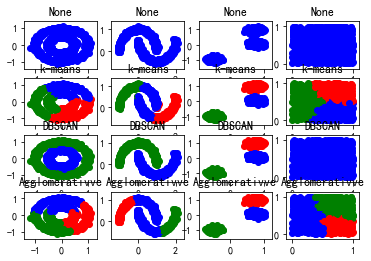

In [2]:
#聚类模型实战举例
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_moons,make_blobs #导入sklearn中构造随机数点的方法，三个方法构造分布不同的随机数
from sklearn.cluster import KMeans #导入KMeans模型
from sklearn.cluster import DBSCAN #导入DBSCAN模型
from sklearn.cluster import AgglomerativeClustering #层次聚类
#配置matplotlib画图的符号
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示坐标中的负号

#设置要生成的点的个数，这里设置要生成1000个随机数点
n_samples = 1000 
#使用make_circles(n_samples = '要生成的随机数个数',factor = 0.5,noise = '要生成的噪声数据占总个数的比例')方法构造第一种分布的随机数（圆形分布）
circles = make_circles(n_samples = n_samples,factor = 0.5,noise = 0.05) #factor:圆形数据分布的间距
#使用make_moons构造第二种分布的随机数
moons = make_moons(n_samples = n_samples,noise = 0.05)
#make_blobs()构造第三中分布的随机数
blobs = make_blobs(n_samples = n_samples,random_state = 8,center_box = (-1,1),cluster_std = 0.1) #设置数据的取值范围是（-1,1）,标准差为0.1
#直接使用np.random.rand('要生成的随机数个数','每个随机数的维度')方法构造无分布的随机数
#生成1000个维度为2的随机数,由于前面的随机数都是带标签的随机数，为了一致故设置数据的标注为None,不加None与加了None的区别，可以打印两者查看不同之处
random_data = np.random.rand(n_samples,2),None 
#查看数据
# print(circles) #可以看出circles的每个随机数都带有一个标签类别
# print(random_data)
#设置matplotlib绘图数据颜色
colors = 'bgrcmyk'  #b:black,g:green,r:red...
#把数据放在列表中，等下遍历取出进行绘制和聚类
data = [circles,moons,blobs,random_data]
#使用列表存放模型,方便使用不同的模型
#KMeans(n_clusters = '要分成的类别数')，2表示将数据分为2个类别
#DBSCAN(min_samples = '最小密度核心的样本数',eps = 'E领域的半径大小')，3表示每个密度核心对象要由至少3个点才可以构成；模型分类的效果需要调参进行调节，可调eps参数
#AgglomerativeClustering(n_clusters = '要分成的类别',linkage ='使用的层次区分方法名')
models = [('None',None),
          ('k-means',KMeans(n_clusters = 3)),
          ('DBSCAN',DBSCAN(min_samples = 3,eps = 0.2)),
          ('Agglomerativve',AgglomerativeClustering(n_clusters = 3,linkage = 'ward'))] 
#导入聚类模型的评价方法
from sklearn.metrics import silhouette_score #导入轮廓系数
#创建绘图画板
f = plt.figure()
#遍历模型和数据，进行绘图可视化
#遍历之前要了解 enumerate()函数，我们需要使用enumerate(‘可遍历的数据对象’)方法将每个数据的数值和数据标注分开。或将一个元组分开
'''
enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
以下是 enumerate() 方法的语法:enumerate(sequence, [start=0]) #start = 0设置数据下标从0开始,不设置默认从0开始。
>>>seasons = ['Spring', 'Summer', 'Fall', 'Winter']
>>>list(enumerate(seasons))
[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
>>> list(enumerate(seasons, start=1))       # 小标从 1 开始
[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]
#for循环
>>>seq = ['one', 'two', 'three']
>>> for i, element in enumerate(seq):
...     print(i, element)
0 one
1 two
2 three

'''
#遍历模型列表
for index,clt in enumerate(models): #返回index:列表中每个元素的下标，clt:列表每个元素的值
    clt_name,clt_entity = clt #获取模型的名字和对象
    #对每个模型，遍历使用每个数据
    for i,dataset in enumerate(data):
        X,Y = dataset # X：数据的数值，Y:数据的标注
        #查看数据
#         print(dataset)
#         print(X)#查看每个数据的数值
#         print(Y)#查看每个数据的标注
        #判断是否存在模型对象或是否使用了聚类模型
        if not clt_entity: #若clt_entity为空则没有使用模型
            clt_res = [0 for item in range(len(X))] #若没有使用模型，则数据不进行聚类 
        else:#若使用了模型
            clt_entity.fit(X) #使用模型对数据X进行聚类
            #使用clt_entity.labels_方法获取聚类后每个数据的标注，并使用astype(np.int)强转为np.int格式数据
            clt_res = clt_entity.labels_.astype(np.int)
        #对每个数据集绘制不同的子图
        f.add_subplot(len(models),len(data),index*len(data)+i+1) #设置每个模型和每个数据集的子图绘制的位置
        plt.title(clt_name) 
        try:#因为轮廓系数是默认对1个以上的分类进行评估的，由于前面我们设定了('None',None)这个空模型，故我们用异常去除掉便可
            #输出每个聚类模型的轮廓系数
            print(clt_name,i,silhouette_score(X,clt_res))
        except:
            pass
        #使用列表运算绘图
        [plt.scatter(X[p,0],X[p,1],color = colors[clt_res[p]]) for p in range(len(X))]
plt.show()


In [ ]:
#聚类算法 Kmeans算法 实战
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
#实战一，读漏电用户进行分类
#pandas读取数据
fname = u'e:/py/数据源/用户是否漏电分类.xlsx'
data0 = pd.read_excel(fname)
# print(data0)
#切片获取后2-5列的数据，转为数组
x = data0.iloc[:,2:5].as_matrix()
# print(x)
#导入sklearn中导入kmeans模型
from sklearn.cluster import Birch
from sklearn.cluster import KMeans  #导入kmeans模型
#创建模型对象 参数 n_clusters = '要分成的类别数'   , n_jobs = 2,模型开启的表示线程数为2，max_iter = '模型循环验证的次数'
kms = KMeans(n_clusters = 3,n_jobs = 3,max_iter = 500)
#对数据进行聚类
y = kms.fit_predict(x)
# print(y)
# print(len(y))
#画条形图
#计算各个类别数,共三类
cla1 = 0
cla2 = 0
cla3 = 0
for i in range(0,len(y)):
    if y[i] == 0:
        cla1+=1
    elif y[i] == 1:
        cla2+=1
    elif y[i] == 2:
        cla3 +=1
print(cla1,cla2,cla3)
# plt.subplot(1,1)
#每个柱子的名字
name_list = ['第一类','第二类','第三类']
#每个柱子的百分比
num_list = [cla1,cla2,cla3]
#画柱子，使用plt.bar(柱子条数，每条柱子的数据（数组形式）,color ='rgb') r为第一条为红色柱子，g为第二条为绿色柱子，b为第三条为蓝色
rects = plt.bar(range(len(num_list)),num_list,color ='rgb',label =name_list )
# plt.bar()
#设置 X轴每个名字的间距
index = [0,1,2,3]
index = [float(c)+0.05 for c in index]
# print(index)
'''
[]运算，从右往左看
上一条语句相当于
for c in index:
    float(c)+=0.5

'''
#画出X轴
plt.xticks(index,name_list) #plt.xticks('每条柱子间距',每条柱子名字)
plt.ylim(10,150)
plt.ylabel('个数')
for rect in rects:#获取每条柱子
    height = rect.get_height()
    #在每条柱子的顶部添加text
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()
#画散点图
# 利用遍历循环画出原来的值的每个点
def erwei():
    from functools import reduce #将二维数组转为一维
    import operator
    fname = 'e:/py/数据源/dongfang2.xlsx'
    data = pd.read_excel(fname)
    data0 = pd.DataFrame(data)
    x1 = data0.iloc[:,:].as_matrix().astype(int)
    data1 = data0.T
    price = list(data1.values[3])#获取价格列    data0为数据框格式，要使用.values[一维行数]才可以取出里面的值
    a = list(data0.iloc[:,:].values[1])
    print(a[0])
    print(a[3])
    print(list(data0.iloc[:,:].values[3]))
#     comt = list(data1.values[0])#获取评论列
#     plt.plot(price,comt,'og')#画图的数据最好为一维数组的数据
#     plt.show()
#     print(x1)
#     print(data0.loc[1:1+1,'ps'].as_matrix().astype(int))
    kms1 = KMeans(n_clusters = 3)
    y1 = kms1.fit_predict(x1)
# #     print(y1)
    for i in range(0,len(y1)):
        #判断点的类别
        a = list(data0.iloc[:,:].values[i])
        b = list(data0.iloc[:,:].values[i])
#         print(a)
        
        if y1[i] == 0:
            #找到该类别的点原来的x轴数据和 y轴数据,然后画出来
            plt.plot(a[0],b[3],'*r')
#             print(data0.loc[i:i+1,'ps'].as_matrix().astype(int))
#             print(data0.iloc[i:i+1,3:4].as_matrix())
        if y1[i] == 1: 
            plt.plot(a[0],b[3],'*g')
        else:
            plt.plot(a[0],b[3],'*b')
#     plt.xlim(0,20)
    plt.xlim(0,300)
    plt.ylim(0,5000)
    plt.show()

#三维
def sanwei():
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fname = 'e:/py/数据源/dongfang2.xlsx'
    data = pd.read_excel(fname)
    data0 = pd.DataFrame(data)
    x1 = data0.iloc[:,:].as_matrix().astype(int)
    a = list(data0.iloc[:,:].values[1])
#     print(a[0])
#     print(a[3])
#     print(list(data0.iloc[:,:].values[3]))
    # 创建一个三维的绘图工程对象
    ax = plt.subplot(111, projection='3d')
    kms1 = KMeans(n_clusters = 3)
    y1 = kms1.fit_predict(x1)
# #     print(y1)
    for i in range(0,len(y1)):
        #判断点的类别
        a = list(data0.iloc[:,:].values[i])
        b = list(data0.iloc[:,:].values[i])
        c = list(data0.iloc[:,:].values[i])
#         print(a)        
        if y1[i] == 0:
            #找到该类别的点原来的x轴数据和 y轴数据,z轴数据，然后画出来
            #三维的x,y,z数据都是一维数组数据
            ax.scatter(a[0],b[3],c[2],'*g',label = 'good_com')
        if y1[i] == 1: 
            ax.scatter(a[0],b[3],c[2],'*r')
        else:
            ax.scatter(a[0],b[3],c[2],'*y')
#     plt.xlim(0,20)
#     #对x,和y数据在3d图上画一条折线
#     ax.plot(list(a[0]),list(b[3]),zs=0,zdir='z')
#     print(list(a[0]))
#     plt.xlabel('评论数')
#     plt.ylabel('价评比')
    ax.set_zlabel('评分')  # 坐标轴
    ax.set_ylabel('评论数')
    ax.set_xlabel('评价比')
    ax.set_xlim(0,300)
    ax.set_ylim(0,5000)
#     plt.zlabel('评分')
    plt.show()
def demo():
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot a sin curve using the x and y axes.
    x = np.linspace(0, 1, 100)
    y = np.sin(x * 2 * np.pi) / 2 + 0.5
    ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')
    # Plot scatterplot data (20 2D points per colour) on the x and z axes.
    colors = ('r', 'g', 'b', 'k')
    x = np.random.sample(20*len(colors))
    y = np.random.sample(20*len(colors))
    c_list = []
    for c in colors:
        c_list.append([c]*20)
    # By using zdir='y', the y value of these points is fixed to the zs value 0
    # and the (x,y) points are plotted on the x and z axes.
    ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')
    # Make legend, set axes limits and labels
    ax.legend()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Customize the view angle so it's easier to see that the scatter points lie
    # on the plane y=0
    ax.view_init(elev=20., azim=-35)
    plt.show()
erwei()
sanwei()
# demo()

In [8]:
#由于没有3.6版本的apriori包，且比较简单，自己照着别人写一个，然后导入到lib中
#自己写一个apriori包写进python库中
#-*- coding: utf-8 -*-
# from __future__ import print_function # 使原来的python2.x转为python3.x的print输出格式,百度一下就知道了
import pandas as pd
 
#自定义连接函数，用于实现L_{k-1}到C_k的连接
def connect_string(x, ms):
    x = list(map(lambda i:sorted(i.split(ms)), x))
    l = len(x[0])
    r = []
    for i in range(len(x)):
        for j in range(i,len(x)):
            if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
                r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
    return r
 
#寻找关联规则的函数
def find_rule(d, support, confidence, ms = u'--'):

    result = pd.DataFrame(index=['support', 'confidence']) #定义输出结果
    print(result)

    support_series = 1.0*d.sum()/len(d) #支持度序列
    column = list(support_series[support_series > support].index) #初步根据支持度筛选
    k = 0

    while len(column) > 1:
        k = k+1
        print(u'\n正在进行第%s次搜索...' %k)
        column = connect_string(column, ms)
        print(u'数目：%s...' %len(column))
        sf = lambda i: d[i].prod(axis=1, numeric_only = True) #新一批支持度的计算函数

        #创建连接数据，这一步耗时、耗内存最严重。当数据集较大时，可以考虑并行运算优化。
        d_2 = pd.DataFrame(list(map(sf,column)), index = [ms.join(i) for i in column]).T

        support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d) #计算连接后的支持度
        column = list(support_series_2[support_series_2 > support].index) #新一轮支持度筛选
        support_series = support_series.append(support_series_2)
        column2 = []

        for i in column: #遍历可能的推理，如{A,B,C}究竟是A+B-->C还是B+C-->A还是C+A-->B？
            i = i.split(ms)
            for j in range(len(i)):
                column2.append(i[:j]+i[j+1:]+i[j:j+1])    
        cofidence_series = pd.Series(index=[ms.join(i) for i in column2]) #定义置信度序列
        for i in column2: #计算置信度序列
              cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]     
        for i in cofidence_series[cofidence_series > confidence].index: #置信度筛选

            result[i] = 0.0
            result[i]['confidence'] = cofidence_series[i]
            result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]   
    result = result.T.sort_values(['confidence','support'], ascending = False) #结果整理，输出
    print(u'\n结果为：')
    print(result)   
    return result

#根据上面的apriori源码进行实战，进行关联实战分析
# from apriori import *
# import pandas as pd
fname = 'e:py/数据源/apriori关联算法.xlsx'
dataframe = pd.read_excel(fname,header = None) #header = None 指不读取excel的第一行作为DataFrame的index,就是读取无表头的excel数据
# print(dataframe)

#对中文数据进行处理，转为数字进行分析
#使用lambda表达式对数据进行处理，我们把只要买了书的都转为 数字1 ，没买到书的空值NaN转为0 ,对行进行读取和修改
#转为0,1矩阵的形式

# Series的定义：Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。
#Series只有一列，默认就是对这一列处理
#对Series（'要改成的值','对该列的判断选出要修改的值），第一个参数是要把选出的值要改为数字1，第二个参数是判断选出要修改为数字1的Series中的值, 
data_change = lambda x:pd.Series(1,index=x[pd.notnull(x)] )#使用pd下面的notnull()判断是否为空值，判断如果是空值的话，就修改值为数字1
#利用map高阶映射函数，对数据进行处理
map_result = list(map(data_change,dataframe.as_matrix()))
# print(map_result)

#将NaN数据转为 数字0
data = pd.DataFrame(map_result).fillna(0)#把map_result转为数据框的格式，然后调用fillna('要把为NaN值得数据转为的值')
#fillna('a')遍历DataFrame，并把为NaN值转为a
# print(data)
#数据处理好后，直接调用apriori库进行关联分析

#设置临界支持度、置信度
support = 0.1
confidence = 0.3

#调用apriori库中寻找关联规则的函数，find_rule('要寻找关联的数据','最小支持度','最小置信度','关系连接符')

result = find_rule(data,support,confidence,ms = u'==>')
print(result)

Empty DataFrame
Columns: []
Index: [support, confidence]

正在进行第1次搜索...
数目：21...

正在进行第2次搜索...
数目：14...

正在进行第3次搜索...
数目：5...

结果为：
                            support  confidence
PHP==>Java                 0.333333    1.000000
Spark==>Java               0.200000    1.000000
PHP==>Spark==>Java         0.133333    1.000000
PHP==>数据分析==>Java          0.133333    1.000000
PHP==>机器学习==>Java          0.133333    1.000000
Java==>机器学习==>PHP          0.133333    1.000000
Spark==>数据分析==>Java        0.133333    1.000000
Spark==>机器学习==>Java        0.133333    1.000000
Java==>机器学习==>Spark        0.133333    1.000000
Spark==>机器学习==>PHP         0.133333    1.000000
PHP==>机器学习==>Spark         0.133333    1.000000
PHP==>Spark==>机器学习         0.133333    1.000000
PHP==>Spark==>机器学习==>Java  0.133333    1.000000
Java==>Spark==>机器学习==>PHP  0.133333    1.000000
Java==>PHP==>机器学习==>Spark  0.133333    1.000000
Java==>PHP==>Spark==>机器学习  0.133333    1.000000
Java==>PHP                 0.333333    0.833333
数据挖掘=

In [1]:
#关联算法Apriori
#版本二 教程视频版本，比较规范也比较复杂，对python和算法的原理理解要求较高。模仿的是sklearn的写法
from itertools import combinations
def comb(lst):
    ret=[]
    for i in range(1,len(lst)+1):
        ret+=list(combinations(lst,i))
    return ret
class AprLayer(object):
    d=dict()
    def __init__(self):
        self.d=dict()
class AprNode(object):
    def __init__(self,node):
        self.s=set(node)
        self.size=len(self.s)
        self.lnk_nodes=dict()
        self.num=0
    def __hash__(self):
        return hash("__".join(sorted([str(itm) for itm in list(self.s)])))
    def __eq__(self, other):
        if "__".join(sorted([str(itm) for itm in list(self.s)]))=="__".join(sorted([str(itm) for itm in list(other.s)])):
            return True
        return False
    def isSubnode(self,node):
        return self.s.issubset(node.s)
    def incNum(self,num=1):
        self.num+=num
    def addLnk(self,node):
        self.lnk_nodes[node]=node.s

class AprBlk():
    def __init__(self,data):
        cnt=0
        self.apr_layers = dict()
        self.data_num=len(data)
        for datum in data:
            cnt+=1
            datum=comb(datum)
            nodes=[AprNode(da) for da in datum]
            for node in nodes:
                if not node.size in self.apr_layers:
                    self.apr_layers[node.size]=AprLayer()
                if not node in self.apr_layers[node.size].d:
                    self.apr_layers[node.size].d[node]=node
                self.apr_layers[node.size].d[node].incNum()
            for node in nodes:
                if node.size==1:
                    continue
                for sn in node.s:
                    sub_n=AprNode(node.s-set([sn]))
                    self.apr_layers[node.size-1].d[sub_n].addLnk(node)

    def getFreqItems(self,thd=1,hd=1):
        freq_items=[]
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num<thd:
                    continue
                freq_items.append((self.apr_layers[layer].d[node].s,self.apr_layers[layer].d[node].num))
        freq_items.sort(key=lambda x:x[1],reverse = True)
        return freq_items[:hd]

    def getConf(self,low=True, h_thd=10, l_thd=1, hd=1):
        confidence = []
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num < h_thd:
                    continue
                for lnk_node in node.lnk_nodes:
                    if lnk_node.num < l_thd:
                        continue
                    conf = float(lnk_node.num) / float(node.num)
                    confidence.append([node.s, node.num, lnk_node.s, lnk_node.num, conf])

        confidence.sort(key=lambda x: x[4])
        if low:
            return confidence[:hd]
        else:
            return confidence[-hd::-1]

class AssctAnaClass():
    def fit(self,data):
        self.apr_blk=AprBlk(data)
        return self
    def get_freq(self,thd=1,hd=1):
        return self.apr_blk.getFreqItems(thd=thd,hd=hd)
    def get_conf_high(self,thd,h_thd=10):
        return self.apr_blk.getConf(low=False, h_thd=h_thd, l_thd=thd)
    def get_conf_low(self,thd,hd,l_thd=1):
        return self.apr_blk.getConf(h_thd=thd,l_thd=l_thd,hd=hd)


def main():
    data=[
        ["牛奶","啤酒","尿布"],
        ["牛奶","啤酒","咖啡","尿布"],
        ["香肠","牛奶","饼干"],
        ["尿布","果汁","啤酒"],
        ["钉子","啤酒"],
        ["尿布","毛巾","香肠"],
        ["啤酒","毛巾","尿布","饼干"]
    ]
#thd = 设置阈值的数量（因为可以设置多个不同的阈值（共有3个），这3个阈值为：最小支持度、最小置信度、最小提升度），hd = 取出前在在阈值范围内的项集个数
    print("Freq",AssctAnaClass().fit(data).get_freq(thd=3,hd=10)) #设置了阈值的个数但是没有设置阈值？
#thd = 阈值的个数 ，h_thd = 高置信度阈值个数  
    print("Conf",AssctAnaClass().fit(data).get_conf_high(thd=3,h_thd=3)) 
if __name__=="__main__":
    main()

Freq [({'啤酒'}, 5), ({'尿布'}, 5), ({'尿布', '啤酒'}, 4), ({'牛奶'}, 3)]
Conf [[{'尿布'}, 5, {'尿布', '啤酒'}, 4, 0.8], [{'啤酒'}, 5, {'尿布', '啤酒'}, 4, 0.8]]


In [25]:
#半监督学习算法 ----标签传播算法
#我们使用sklearn中的Iris数据集进行算法验证，我们把原来一些有标注的数据，把它们的标注删除掉（转为-1标注），
# 从而使Iris数据集变为一部分有标注和一部分无标注的数据集

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.target #获取数据标签个数
iris.data #获取数据
#使用copy()方法，复制原数据的标签，以方便在下面修改标签时，保证原数据的标签不变
labels = np.copy(iris.target)
# print(len(iris.target)) #输出每个标签的数据个数，也就是每一个标签列的行数
# print(len(labels))

#数据预处理，由于sklearn的标签传播算法要求要把无标注的数据的标注设为-1
#我们随机从数据集中选择一些数据，然后把它们的标注设为-1
random_unlabeled_points = np.random.rand(len(iris.target))#使用np.random.rand(随机数个数)生成0-1之间的随机数
#将随机数据转为True,False形式的数据，使用一个判断，得到一个Ture和False的组成的随机数组，然后利用这个数组随机将样本某些数据转为无标注数据
random_unlabeled_points = random_unlabeled_points < 0.7  #我们进行一个判断<0.7的数据返回True，>=0.7返回False,得到一个True和False数组
# print(random_unlabeled_points)
Y = labels[random_unlabeled_points] #Y:标注将要转为-1的数据的原标注
print(Y)
print(len(Y))
#为了随机随机选择某些数据设为无标注数据（再把无标注数据的标注设为-1）,我们根据由随机数生成的True和False数组，随机将labels中的模型数据标注转为-1
labels[random_unlabeled_points] = -1 #对列表每个数据进行逻辑运算，若labels[True] 则将对应的数据转为 -1 ，若labels[False]，则原来数据不变
# print(iris.target) #原来数据的标注
# print(labels)#随机选取某些数据并去掉它们的标注(转为-1表示)后的数据集
print('已标注的数据有：',len(labels) - list(labels).count(-1))
print('未标注的数据有:',list(labels).count(-1)) #统计出转为无标注数据的个数,与Y长度相等 

#导入半监督的标签传播算法
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation() #创建标签传播算法对象
label_prop_model.fit(iris.data,labels) #使用iris.data数据和随机混合标签labels对模型进行训练
Y_pred = label_prop_model.predict(iris.data) #对原来的数据进行预测，Y_pred为原来数据的预测结果
#然后将原来数据的预测结果转为随机数据（也就是选取某些数据作为无标注-1的数据集）的预测结果，也就是无标签-1数据的预测结果
Y_unlabeled_pred = Y_pred[random_unlabeled_points] #其长度与Y的长度是一样的
print(len(Y_unlabeled_pred))
print(Y_unlabeled_pred)

#对半监督学习结果的评价
#即对Y于Y_unlabeled_pred的评价
from sklearn.metrics import accuracy_score,recall_score,f1_score
print('ACC:',accuracy_score(Y,Y_unlabeled_pred))
#使用recall_score(Y,Y_pred,average = 'binary')方法计算召回率的时候，默认Y和Y_pred数据格式为binary的0或1的二值数据格式
#但是在实际中我们的Y和Y_pred并不只是0,1数值还会是其他数值，这里我们把binary换成是micro参数便可
print('REC:',recall_score(Y,Y_unlabeled_pred,average = 'micro')) 
print('F1_Score:',f1_score(Y,Y_unlabeled_pred,average = 'micro'))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
104
已标注的数据有： 46
未标注的数据有: 104
104
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2]
ACC: 0.9423076923076923
ROC: 0.9423076923076923
F1_Score: 0.9423076923076923


#  sklearn中各类模型的评估方法

    1、分类模型的评估：分类模型的评估又分为：二分类模型评估、多分类模型评估；
    二分类（结果只有0或1类的分类）：其中类别为1（True）的称为正类，类别为0(False)的称为负类。
        二分类的评估需要的数据为：测试数据与预测数据，它们的形式为：Y_test=[0,1,1,0,0,0,1,...,1,0,1], Y_pred = [1,0,1,0,0,1,...,1,0,0]
        评估的方法就是要比较Y_test和Y_pred的不同。
        混淆矩阵：就是包含真实值结果和错误值结果的混合矩阵，即由TP、FN、FP、TN组成的矩阵；其中
        TP：实际是正类，模型识别为正类；FN：实际为正类，模型识别为负类（或者遗漏）；FP：实际为负类，模型识别为正类；TN：实际为负类，模型识别为负类
        二分类评估模型的关键指标（通过混淆矩阵获得）：
        模型的正确率(Accuracy_score)：(TP+TN)/(TP+FN+FP+TN)
        召回率TPR(Recall_score):TP/(TP+FN)
        F1_score: 2*Recall_score*Accuracy_score/(Recall_score+Accuracy_score)
        精准率或查准率(Precision):TP/(TP+FP)，比正确率要好；
        错误接受率(FPR):FP/(FP+TN)
        错误拒绝率(FRR):FN/(TP+FN)
     多分类：其模型的类别是多类别的分类模型；下面是多分类模型效果的评估指标；
         多分类模型评估的关键指标（通过多元混淆矩阵获得）：
         准确率Accuracy_score:与二分类的计算一样；
         召回率Recall_score与F1_score: 在sklearn中通过设置average = 'micro'表示计算的是多分类模型的召回率Recall_score和F1_score值。
       
     分类模型效果的可视化评估（作图）：一般使用的模型效果可视化的曲线为：ROC与AUC曲线(该曲线的两个参数为ROC和AUC)；
         ROC与AUC曲线：（实例绘制上一章keras神经网络的ROC和AUC曲线）
         增益图与KS图：
           
    2、回归模型的评估：（实例在上章的回归模型中）
        回归模型评估的是两个连续值的不同。Y_test = [0.2,0.8,0.5,0.1,...,0.2,1.1] ,Y_pred=[0.1,0.8,0.6,0.2,...,0.2,0.8]
        回归模型评估的关键指标有：
        MAE:指的是计算模型预测结果的残差绝对值的平均值，并用来评估回归模型；
        MSE:残差的平方求均值，（常用）；
        RMSE:对MSE开根号；
        r2_score(决定系数)：即求出回归模型预测的每个结果与原来正确的结果的R^2值，R^2越大效果越好；（常用）
    3、聚类模型的评估：
        聚类模型的评估关键指标有：
        RMS：聚类平方开发平均值，即RMS = 每个聚类与该类中心值的差值平方求和，然后开方求再平均值；
        
        轮廓系数(实例在上章的聚类算法中)：a(i)为样本i与簇内（同一类内）的其他样本平均距离；
                b(i)为样本i与其他某簇（其他某类）样本的平均距离，多个簇b(i)取最小。
                公式为：
                轮廓系数：s(i) = (b(i)-a(i))/max{a(i),b(i)}
        
    4、关联模型的评估：
        关键指标有：
        支持度：查看关联模型实例
        置信度：查看关联模型实例
        提升度：查看关联模型实例

# 对于模型的评估总的来说，大部分可以通过评估参数查看模型效果，但有时候参数也不能真正完全正确的反应模型的效果。在实际中我们还需要根据实际情况并配合模型的评估参数进行判断，选出效果最佳的模型。




# 所有课程的总结：

    学完了整个课程的所有内容，我们总结出在实际中数据挖掘与机器学习的操作步骤为：
    a.数据的获取----->b.探索分析与数据可视化 ------>c.预处理理论------>d.分析探索结论和数据，选择合适的模型并建模---->e.对模型进行评估
    
    其中a、b步骤属于数据分析过程，c、d、e步骤属于数据挖掘过程；
    心得：
    我们要学会多角度看数据！
        1、角度一，以目的决策的角度对数据进行分析，步骤为：描述、断因、预测、决策；（少用）
        2、角度二，以过程探索的思路对数据进行分析，步骤为：数据采集、探索分析、特征工程、数据建模、模型评估、模型应用、模型融合（这是最常用的思路）；
        3、角度三，以解决问题 的方法对数据进行分析，步骤为：对比分析、交叉分析、分组分析、因素分析、主成分分析、聚类分析等；

#  补充：文本信息的提取与转换。
#  对数据进行数据挖掘之第一步骤，文本特征抽取与向量化

# 步骤如下：

    本文为大家分享了Python文本特征抽取与向量化的具体代码，供大家参考，具体内容如下

假设我们刚看完诺兰的大片《星际穿越》，设想如何让机器来自动分析各位观众对电影的评价到底是“赞”（positive）还是“踩”（negative）呢？
这类问题就属于情感分析问题。这类问题处理的第一步，就是将文本转换为特征。
因此，这章我们只学习第一步，如何从文本中抽取特征，并将其向量化。
由于中文的处理涉及到分词问题，本文用一个简单的例子来说明如何使用Python的机器学习库，对英文进行特征提取。
1、数据准备
Python的sklearn.datasets支持从目录读取所有分类好的文本。不过目录必须按照一个文件夹一个标签名的规则放好。比如本文使用的数据集共有2个标签，一个为“net”，一个为“pos”，每个目录下面有6个文本文件。目录如下所示：
neg
    1.txt
    2.txt
    ......
pos
    1.txt
    2.txt
    ....
12个文件的内容汇总起来如下所示：
neg: 
  shit. 
  waste my money. 
  waste of money. 
  sb movie. 
  waste of time. 
  a shit movie. 
pos: 
  nb! nb movie! 
  nb! 
  worth my money. 
  I love this movie! 
  a nb movie. 
  worth it! 
2、文本特征
如何从这些英文中抽取情感态度而进行分类呢？
最直观的做法就是抽取单词。通常认为，很多关键词能够反映说话者的态度。比如上面这个简单的数据集，很容易发现，凡是说了“shit”的，就一定属于neg类。
当然，上面数据集是为了方便描述而简单设计的。现实中一个词经常会有穆棱两可的态度。但是仍然有理由相信，某个单词在neg类中出现的越多，那么他表示neg态度的概率越大。
同样我们注意到有些单词对情感分类是毫无意义的。比如上述数据中的“of”，“I”之类的单词。这类词有个名字，叫“Stop_Word”（停用词）。这类词是可以完全忽略掉不做统计的。显然忽略掉这些词，词频记录的存储空间能够得到优化，而且构建速度也更快。
把每个单词的词频作为重要的特征也存在一个问题。比如上述数据中的”movie“，在12个样本中出现了5次，但是出现正反两边次数差不多，没有什么区分度。而”worth“出现了2次，但却只出现在pos类中，显然更具有强烈的刚晴色彩，即区分度很高。
因此，我们需要引入TF-IDF（Term Frequency-Inverse Document Frequency，词频和逆向文件频率）对每个单词做进一步考量。
TF（词频）的计算很简单，就是针对一个文件t，某个单词Nt 出现在该文档中的频率。比如文档“I love this movie”，单词“love”的TF为1/4。如果去掉停用词“I"和”it“，则为1/2。
IDF（逆向文件频率）的意义是，对于某个单词t，凡是出现了该单词的文档数Dt，占了全部测试文档D的比例，再求自然对数。
比如单词“movie“一共出现了5次，而文档总数为12，因此IDF为ln(5/12)。
很显然，IDF是为了凸显那种出现的少，但是占有强烈感情色彩的词语。比如“movie”这样的词的IDF=ln(12/5)=0.88，远小于“love”的IDF=ln(12/1)=2.48。
TF-IDF就是把二者简单的乘在一起即可。这样，求出每个文档中，每个单词的TF-IDF，就是我们提取得到的文本特征值。
3、向量化
有了上述基础，就能够将文档向量化了。我们先看代码，再来分析向量化的意义： 
import scipy as sp 
import numpy as np 
from sklearn.datasets import load_files 
from sklearn.cross_validation import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
 
'''''加载数据集，切分数据集80%训练，20%测试'''
movie_reviews = load_files('endata') #数据在endata文件夹里面 
doc_terms_train, doc_terms_test, y_train, y_test  = train_test_split(movie_reviews.data, movie_reviews.target, test_size = 0.3) 
    
'''''BOOL型特征下的向量空间模型，注意，测试样本调用的是transform接口'''
count_vec = TfidfVectorizer(binary = False, decode_error = 'ignore',stop_words = 'english') 
x_train = count_vec.fit_transform(doc_terms_train) 
x_test = count_vec.transform(doc_terms_test) 
x    = count_vec.transform(movie_reviews.data) 
y    = movie_reviews.target 
print(doc_terms_train) 
print(count_vec.get_feature_names()) #获取特征值的标签，就是每个txt的标签
print(x_train.toarray()) #获取数据的特征值，转为数组展示
print(movie_reviews.target) #
运行结果如下：
[b'waste of time.', b'a shit movie.', b'a nb movie.', b'I love this movie!', b'shit.', b'worth my money.', b'sb movie.', b'worth it!']
['love', 'money', 'movie', 'nb', 'sb', 'shit', 'time', 'waste', 'worth']
[[ 0.          0.          0.          0.          0.          0.   0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.60335753  0.          0.          0.79747081   0.          0.          0.        ]
 [ 0.          0.          0.53550237  0.84453372  0.          0.          0.   0.          0.        ]
 [ 0.84453372  0.          0.53550237  0.          0.          0.          0.   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.   0.          0.        ]
 [ 0.          0.76642984  0.          0.          0.          0.          0.   0.          0.64232803]
 [ 0.          0.          0.53550237  0.          0.84453372  0.          0.   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.   0.          1.        ]]
[1 1 0 1 0 1 0 1 1 0 0 0]
python输出的比较混乱。我这里做了一个表格如下：

从上表可以发现如下几点：
1、停用词的过滤。
初始化count_vec的时候，我们在count_vec构造时传递了stop_words = 'english'，表示使用默认的英文停用词。可以使用count_vec.get_stop_words()查看TfidfVectorizer内置的所有停用词。当然，在这里可以传递你自己的停用词list（比如这里的“movie”），我们可以把从网上找到的停用词，转为列表后传进去就可以去除停用词了
2、TF-IDF的计算。
这里词频的计算使用的是sklearn的TfidfVectorizer。这个类继承于CountVectorizer，在后者基本的词频统计基础上增加了如TF-IDF之类的功能。
我们会发现这里计算的结果跟我们之前计算不太一样。因为这里count_vec构造时默认传递了max_df=1，因此TF-IDF都做了规格化处理，以便将所有值约束在[0,1]之间。
3、count_vec.fit_transform()(该方法是获取数据的特征值)的结果是一个巨大的矩阵。我们可以看到上表中有大量的0，因此sklearn在内部实现上使用了稀疏矩阵。本例子数据较小。如果读者有兴趣，可以试试机器学习科研工作者使用的真实数据，来自康奈尔大学：http://www.cs.cornell.edu/people/pabo/movie-review-data/。这个网站提供了很多数据集，其中有几个2M左右的数据库，正反例700个左右。这样的数据规模也不算大，1分钟内还是可以跑完的，建议大家试一试。不过要注意这些数据集可能存在非法字符问题。所以在构造count_vec时，传入了decode_error = 'ignore'，以忽略这些非法字符。
上表的结果，就是训练8个样本的8个特征的一个结果。这个结果就可以使用各种分类算法进行分类了。
得到每个文件夹中下的每个txt文件的特征值和标签后，如上面例子，特征值用count_vec.fit_transform(doc_terms_train)方法获取，标签用
count_vec.get_feature_names()方法获取，如上面所示
获取到特征值和标签后我们就可以直接使用sklearn下的两个库直接调用相应的方法进行分类了 

#  一般数组与稀疏矩阵的转换，以及数据维度的增加, 把原来数据的特征维度增加，

# 用 0 代替没用值得数据，然后再转为稀疏矩阵

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np
# from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
# from scipy import sparse
import scipy
def get_stop_word():
    stop = open('e:py/数据源/stop_words.txt','r',encoding = 'utf-8').read()
    stop_word = stop.split(u'\n')
    return stop_word
stop_word = get_stop_word()

#数据转换方法一,转化的数据，已经降维优化了
file_name = 'e:/py/谣言新闻/health/4.txt'
data1 = open(file_name,'r',encoding = 'utf-8').read()
data = np.array([data1])
# print(data)

print('---------------方法一获取的文本数据的维度')
text_vec = CountVectorizer(stop_words = stop_word)
x_test1 =text_vec.fit_transform(data)#data2必须为二维数组,返回的是稀疏矩阵
print(x_test1.shape[1])

print('*************************************')
#文本数据转换方法二，转化的数据已经降维优化了
text_vec = TfidfVectorizer(binary=False,decode_error='ignore',stop_words = stop_word)
#获取特征值,使用fit_transform()方法将数据归一化，标准化
# x_train = text_vec.fit_transform(text_train)#将text_train训练数据转为特征值数组形式
# y_train = text_vec.fit_transform(y_train)
# y_test = text_vec.fit_transform(y_test)
x_test = text_vec.fit_transform(data)#将数据压缩，并转为稀疏矩阵的形式
print('-----------方法二获取的文本数据维度')
print(x_test.shape[1])


#使用pca算法对数据进行降维
'''
    1、函数原型及参数说明
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
参数说明：
n_components:  
意义：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
类型：int 或者 string，缺省时默认为None，所有成分被保留。
          赋值为int，比如n_components=1，将把原始数据降到一个维度。
          赋值为string，比如n_components='mle'，将自动选取特征个数n，使得满足所要求的方差百分比。
copy:
类型：bool，True或者False，缺省时默认为True。
意义：表示是否在运行算法时，将原始训练数据复制一份。
        若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；
        若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。
whiten:
类型：bool，缺省时默认为False
意义：白化，使得每个特征具有相同的方差。关于“白化”，可参考：Ufldl教程
2、PCA的对象
components_ ：返回具有最大方差的成分。
explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
n_components_：返回所保留的成分个数n。
mean_：
noise_variance_：
3、PCA对象的方法
fit(X,y=None)
fit()可以说是scikit-learn中通用的方法，每个需要训练的算法都会有fit()方法，它其实就是算法中的“训练”这一步骤。因为PCA是无监督学习算法，此处y自然等于None。
fit(X)，表示用数据X来训练PCA模型。
函数返回值：调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练。
fit_transform(X)
用X来训练PCA模型，同时返回降维后的数据。
newX=pca.fit_transform(X)，newX就是降维后的数据。
inverse_transform()
将降维后的数据转换成原始数据，X=pca.inverse_transform(newX) 
transform(X)
将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。
此外，还有get_covariance()、get_precision()、get_params(deep=True)、score(X, y=None)等方法，以后用到再补充吧。
from sklearn.decomposition import PCA
pca = PCA(n_components = 'mle')
newdata = pca.fit_transform(data)
print(newdata.shape)

'''
#利用toarray()将稀疏矩阵转为一般数列
new_array = x_test1.toarray()
# print(new_array)
#构造x_test1要转成的维度数组
b = np.zeros((1,10000))
# 输出构造的数组的维度数
print(b.shape[1])
# e = np.array([[1,2,8]])
# t = np.array([[0,0,0,0]])
# for i in range(0,len(e[0])):
#     print(e[0][i])
#     t[0][i] = e[0][i]
# print(t)
#利用循环，把new_array中的数值转为维度为10000的数组矩阵b
for j in range(0,len(new_array[0])):
    b[0][j] = new_array[0][j]
#输出转为10000维度的new_array数组
# print(b)
#新数组的维度
print(b.shape[1])
g = coo_matrix(b) #利用coo_matrix()将一般数组b转为稀疏矩阵
print(g)
#输出维度变为10000维度的x_test1的特征数
print(g.shape[1])

# 股票数据接口的获取
1、国外：使用fix_yahoo_finance包和pandas_datareader包直接从 yahoo获取实时的美国
股市市场的股票金融数据。以阿里巴巴和京东为例。
2、国内：获取国内各种股票数据Pandas是数据分析工具包
TuShare是国内股票数据抓取工具，除了股票的实时和历史数据，还有基本面数
据，加上自然语言处理（比如情绪分析），或者机器学习，就比较有趣了。
Tushare是一个免费、开源的python财经数据接口包。主要实现对股票等金融数据从数据采集、清洗加工 到 数据存储的过程，能够为金融分析人员提供快速、整洁、和多样的便于分析的数据，为他们在数据获取方面极大地减轻工作量，使他们更加专注于策略和模型的研究与实现上。考虑到Python pandas包在金融量化分析中体现出的优势，Tushare返回的绝大部分的数据格式都是pandas DataFrame类型，非常便于用pandas/NumPy/Matplotlib进行数据分析和可视化。当然，如果您习惯了用Excel或者关系型数据库做分析，您也可以通过Tushare的数据存储功能，将数据全部保存到本地后进行分析。应一些用户的请求，从0.2.5版本开始，Tushare同时兼容Python 2.x和Python 3.x，对部分代码进行了重构，并优化了一些算法，确保数据获取的高效和稳定。
只要知道国内某只股票的代码就可以获取该股票的各种数据了
api: http://tushare.waditu.com/trading.html

In [ ]:
#国外以阿里和京东为例
import pandas as pd
from pandas_datareader import data as pdr
import datetime
import fix_yahoo_finance as yf
yf.pdr_override()
#获取阿里bab实时股票数据
finance = pdr.get_data_yahoo('BABA',start = datetime.datetime(2014,11,11),end = datetime.datetime(2018,7,23))
# print(finance.tail(5))
print(finance.describe())
# dir(finance)
#由于原数据集的dataframe的索引
# print(finance.index)
#画图
import matplotlib.pyplot as plt
plt.plot(finance.index,finance['Open'],color='r')
plt.show()
#导出阿里巴巴的股票数据
file = 'e:/py/数据源/alibaba.xlsx'
finance.to_excel(file,index =True)  #False是不带DataFrame索引输出，True带上DataFrame索引输出
#获取京东在美国市场的实时数据
finance2 = pdr.get_data_yahoo('JD',start = datetime.datetime(2014,5,23),end = datetime.datetime(2018,7,23))
# print(finance2.tail(5))
print(finance2.describe())
#导出京东股票数据
file = 'e:/py/数据源/jd.xlsx'
finance.to_excel(file,index =True)
#转为数据框
#画图
plt.plot(finance2.index,finance2['Open'],color = 'b')
# plt.ylim(30,50)
plt.figure()

In [ ]:
#国内以平安为例
import tushare as ts
import pandas as pd
#中国平安
data = ts.get_tick_data('601318',date = '2018-07-23')
# print(data)
data2 = ts.get_hist_data('601318',start = '2017-07-23',end = '2018-07-23')
da2 = pd.DataFrame(data2)
print(data2)
print(da2.describe())

# # 可学习式的情感分析

# 手机评论情感分析

# 看例子 https://blog.csdn.net/AsuraDong/article/details/72877379

# 例子二https://blog.csdn.net/cjjwwss/article/details/79953397

    情感分析就是分析一句话说得是很主观还是客观描述，分析这句话表达的是积极的情绪还是消极的情绪
    
    
    情感分析简介：

    情感分析就是分析一句话说得是很主观还是客观描述，分析这句话表达的是积极的情绪还是消极的情绪。

    原理
    比如这么一句话：“这手机的画面极好，操作也比较流畅。不过拍照真的太烂了！系统也不好。”
    ① 情感词
    要分析一句话是积极的还是消极的，最简单最基础的方法就是找出句子里面的情感词，积极的情感词比如：赞，好，顺手，华丽等，消极情感词比如：差，烂，坏，坑爹等。出现一个积极词就+1，出现一个消极词就-1。
    里面就有“好”，“流畅”两个积极情感词，“烂”一个消极情感词。那它的情感分值就是1+1-1+1=2. 很明显这个分值是不合理的，下面一步步修改它。
    ② 程度词
    “好”，“流畅”和‘烂“前面都有一个程度修饰词。”极好“就比”较好“或者”好“的情感更强，”太烂“也比”有点烂“情感强得多。所以需要在找到情感词后往前找一下有没有程度修饰，并给不同的程度一个权值。比如”极“，”无比“，”太“就要把情感分值*4，”较“，”还算“就情感分值*2，”只算“，”仅仅“这些就*0.5了。那么这句话的情感分值就是：4*1+1*2-1*4+1=3
    ③ 感叹号
    可以发现太烂了后面有感叹号，叹号意味着情感强烈。因此发现叹号可以为情感值+2. 那么这句话的情感分值就变成了：4*1+1*2-1*4-2+1 = 1
    ④ 否定词
    明眼人一眼就看出最后面那个”好“并不是表示”好“，因为前面还有一个”不“字。所以在找到情感词的时候，需要往前找否定词。比如”不“，”不能“这些词。而且还要数这些否定词出现的次数，如果是单数，情感分值就*-1，但如果是偶数，那情感就没有反转，还是*1。在这句话里面，可以看出”好“前面只有一个”不“，所以”好“的情感值应该反转，*-1。
    因此这句话的准确情感分值是：4*1+1*2-1*4-2+1*-1 = -1
    ⑤ 积极和消极分开来
    再接下来，很明显就可以看出，这句话里面有褒有贬，不能用一个分值来表示它的情感倾向。而且这个权值的设置也会影响最终的情感分值，敏感度太高了。因此对这句话的最终的正确的处理，是得出这句话的一个积极分值，一个消极分值（这样消极分值也是正数，无需使用负数了）。它们同时代表了这句话的情感倾向。所以这句评论应该是”积极分值：6，消极分值：7“
    ⑥ 以分句的情感为基础
    再仔细一步，详细一点，一条评论的情感分值是由不同的分句加起来的，因此要得到一条评论的情感分值，就要先计算出评论中每个句子的情感分值。这条例子评论有四个分句，因此其结构如下（[积极分值, 消极分值]）：[[4, 0], [2, 0], [0, 6], [0, 1]] 
    以上就是使用情感词典来进行情感分析的主要流程了，算法的设计也会按照这个思路来实现。
    算法设计
    第一步：读取评论数据，对评论进行分句。
    第二步：查找对分句的情感词，记录积极还是消极，以及位置。
    第三步：往情感词前查找程度词，找到就停止搜寻。为程度词设权值，乘以情感值。
    第四步：往情感词前查找否定词，找完全部否定词，若数量为奇数，乘以-1，若为偶数，乘以1。
    第五步：判断分句结尾是否有感叹号，有叹号则往前寻找情感词，有则相应的情感值+2。
    第六步：计算完一条评论所有分句的情感值，用数组（list）记录起来。
    第七步：计算并记录所有评论的情感值。
    第八步：通过分句计算每条评论的积极情感均值，消极情感均值，积极情感方差，消极情感方差。

In [ ]:
import pandas as pd
fname = open('e:py\\数据源\\手机_2300.csv') #读取带中文名字的csv文件先用open打开一下
# fname = 'e:py/数据源/手机_2300.csv'
df = pd.read_csv(fname)
# 查看导入的头部数据
# data.head()
#查看情绪数值
# data['sentiment'].values
#随机查看10条数据
# data.sample(10)
#统计一下情绪列的数据
# data['sentiment'].describe()
#DataFrame中的操作，查看正面情绪，这里使用isin（）方法
#使用isin()选出特定列中包含特定值的行
#选出data中的'sentiment'列中包含有['pos']值得列

# data[data['sentiment'].isin(['pos'])]
#对文本数据进行分词
import jieba

labels = df['sentiment']
documents = df['comment']
documents = [' '.join(jieba.lcut(doc)) for doc in documents]
# print(documents)
# for item in documents:
#     print(item)


#提取特征，对分好的词语提取特征
# 本特征提取：
#     将文本数据转化成特征向量的过程
#     比较常用的文本特征表示法为词袋法
# 词袋法：
#     不考虑词语出现的顺序，每个出现过的词汇单独作为一列特征
#     这些不重复的特征词汇集合为词表
#     每一个文本都可以在很长的词表上统计出一个很多列的特征向量
#     如果每个文本都出现的词汇，一般被标记为 停用词 不计入特征向量
    
# 主要有两个api来实现 CountVectorizer 和 TfidfVectorizer
# CountVectorizer：
#     只考虑词汇在文本中出现的频率
# TfidfVectorizer：
#     除了考量某词汇在文本出现的频率，还关注包含这个词汇的所有文本的数量
#     能够削减高频没有意义的词汇出现带来的影响, 挖掘更有意义的特征

# 相比之下，文本条目越多，Tfid的效果会越显著


# 下面对两种提取特征的方法，分别设置停用词和不停用，
# 使用朴素贝叶斯进行分类预测，比较评估效果

#获取文本数据的特征值
# CountVectorizer与TfidfVectorizer，这两个类都是特征数值计算的常见方法。对于每一个训练文本，
# CountVectorizer只考虑每种词汇在该训练文本中出现的频率，而TfidfVectorizer除了考量某一词汇在当前训练文本中出现的频率之外，
# 同时关注包含这个词汇的其它训练文本数目的倒数。相比之下，训练文本的数量越多，TfidfVectorizer这种特征量化方式就更有优势。

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5)
matrix = tfidf.fit_transform(documents)
# print(matrix)

#机器自己构造训练数据，就是自己从数据中随机选出数据进行训练,随机选出测试数据

#只有足够多的语料库，进行训练才可以得出比较高的正确率
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(matrix, labels, test_size=0.3)

# print(X_train)
#自己分类
# X_test = 

#使用svm向量机进行分类

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print(clf.score(X_test,y_test))
#分好类后取出10个测试数据进行情感预测测试
y_pred = clf.predict(X_test[-10:])
# print(X_test[-10:])
print(y_pred)
print(y_test[-10:].values)
print(len(y_test[-10:].values))
count = 0
for i in range(0,len(list(y_test[-10:]))):
    if(y_pred[i]==y_test[-10:].values[i]):
        count+=1
print('模型正确率为: %f' %(float(count/len(y_test[-10:].values))))


# 首先简单介绍一下这个库可以进行哪些文本挖掘。snownlp主要可以进行中文分词（算法是Character-Based Generative Model）、词性标注（原理是TnT、3-gram 隐马）、情感分析（官网木有介绍原理，但是指明购物类的评论的准确率较高，其实是因为它的语料库主要是购物方面的，可以自己构建相关领域语料库，替换原来的，准确率也挺不错的）、文本分类（原理是朴素贝叶斯）、转换拼音、繁体转简体、提取文本关键词（原理是TextRank）、提取摘要（原理是TextRank）、分割句子、文本相似（原理是BM25）。官网还有更多关于该库的介绍，在看我这个文章之前，建议先看一下官网，里面有最基础的一些命令的介绍。官网链接：https://pypi.python.org/pypi/snownlp/0.11.1。

    下面正式介绍实例应用。主要是中文文本的情感分析，我今天从京东网站采集了249条关于笔记本的评论文本作为练习数据，由于我只是想练习一下，没采集更多。然后人工标注每条评论的情感正负性，情感正负性就是指该条评论代表了评论者的何种态度，是褒义还是贬义。以下是样例
    其中-1表示贬义，1表示褒义。由于snownlp全部是unicode编码，所以要注意数据是否为unicode编码。因为是unicode编码，所以不需要去除中文文本里面含有的英文，因为都会被转码成统一的编码（补充一下，关于编码问题，我还是不特别清楚，所以这里不多讲，还请对这方面比较熟悉的伙伴多多指教）。软件本身默认的是Ascii编码，所以第一步先设置软件的默认编码为utf-8，python3不用设置了，自己默认为utf-8编码
2、然后准备数据
import pandas as pd #加载pandas
text=pd.read_excel(u'F:/自然语言处理/评论文本.xlsx',header=0) #读取文本数据
text0=text.iloc[:,0] #提取所有数据
text1=[i.decode('utf-8') for i in text0] #上一步提取数据不是字符而是object，所以在这一步进行转码为字符
3、训练语料库
from snownlp import sentiment #加载情感分析模块
sentiment.train('E:/Anaconda2/Lib/site-packages/snownlp/sentiment/neg.txt', 'E:/Anaconda2/Lib/site-packages/snownlp/sentiment/pos.txt') #对语料库进行训练，把路径改成相应的位置。我这次练习并没有构建语料库，用了默认的，所以把路径写到了sentiment模块下。
sentiment.save('D:/pyscript/sentiment.marshal')#这一步是对上一步的训练结果进行保存，如果以后语料库没有改变，下次不用再进行训练，直接使用就可以了，所以一定要保存，保存位置可以自己决定，但是要把`snownlp/seg/__init__.py`里的`data_path`也改成你保存的位置，不然下次使用还是默认的。
4、进行预测
from snownlp import SnowNLP
senti=[SnowNLP(i).sentiments for i in text1] #遍历每条评论进行预测
5、进行验证准确率
预测结果为positive的概率，positive的概率大于等于0.6，我认为可以判断为积极情感，小于0.6的判断为消极情感。所以以下将概率大于等于0.6的评论标签赋为1，小于0.6的评论标签赋为-1，方便后面与实际标签进行比较。
运行结果为：
准确率还可以，但还不算高，原因是我考虑时间原因，并且我只是练习一下，所以没有自己构建该领域的语料库，如果构建了相关语料库，替换默认语料库，准确率会高很多。所以语料库是非常关键的，如果要正式进行文本挖掘，建议要构建自己的语料库。在没有构建新的语料库的情况下，这个83.9357%的准确率还是不错了。
     以上是我这次的学习笔记，和大家分享一下，有不足之处请大家批评指正。我还是一个刚涉世数据挖掘、机器学习、文本挖掘领域不久的小白，有许多知识还是比较模糊，但对这数据挖掘很感兴趣。希望能多结识这方面的朋友，共同学习、共同进步。

In [ ]:
#snownlp库情感分析
# 1.改变库的编码
from imp import reload
import sys
# reload(sys)
# sys.defaultencoding('utf-8')#导入库，将库编码改为utf-8的编码格式,而在python3中已经默认为utf-8的编码格式了
# 2.导入数据
import pandas as pd
fname = open('e:py/数据源/手机_2300.csv')
data_text = pd.read_csv(fname)
data = data_text.loc[:,'comment'].as_matrix()#转为数组
sentiments_data = data_text.loc[:,'sentiment']
# print(sentiments_data)
# print(data[2])
#3.导入训练数据，训练语料库
from snownlp import sentiment #导入情感分析模块sentiment
#训练语料库
sentiment.train('e:py/数据源/情感分析词典/negative.txt','e:py/数据源/情感分析词典/positive.txt')
#将训练好的语料库保存起来，下次就直接调用这个训练好的语料库就可以了
sentiment.save('e:py/数据源/snownlp_train_data.marshal')
# 4.多个进行预测
from snownlp import SnowNLP
senti = [SnowNLP(i).sentiments for i in data] #遍历每条评论,返回一个(0到1)的概率数组值
#单个测试
#步骤
# from snownlp import SnowNLP
# s = SnowNLP(u'这个东西真心很赞')
# key=s.words # [u'这个', u'东西', u'真心',
# # u'很', u'赞']
# pos=s.tags # [(u'这个', u'r'), (u'东西', u'n'),
# # (u'真心', u'd'), (u'很', u'd'),
# # (u'赞', u'Vg')]
# sentiment=s.sentiments#返回的是一个概率，如果概率>0.6我们可以认为是积极的情感

text = u'吃屎吧，我非常愤怒，讨厌，恶心'
text2 = u'我爱你，我喜欢，我高兴，我快乐，很高兴'
single = SnowNLP(text2)
single_score = single.sentiments
print(float(single_score))
#使用round（数据，'要保留的小数位数四舍五入'）
print(round(single_score,8))
if float(single_score)>0.6:
    print('乐观语句')
else:
    print('消极语句')
# 5.进行验证准确率
# 预测结果为positive的概率，positive的概率大于等于0.6，我认为可以判断为积极情感，小于0.6的判断为消极情感。
# 所以以下将概率大于等于0.6的评论标签赋为pos，小于0.6的评论标签赋为neg，方便后面与实际标签进行比较。
newlist=[]
for i in senti:
    if(i>0.6):
        newlist.append('pos')
    else: 
        newlist.append('neg')
#给原来的数据添加新一列newlist
data_text['newlist'] = newlist
# print(data_text.loc[1,'newlist']==data_text.loc[1,'sentiment'])
# print(data_text['newlist'])
# print(data_text)
#对新一列进行统计，计算正确率

count = 0
# print(data_text.loc[1:'sentiment'].values)
# print(data_text.loc[1:'newlist'].values)
print(len(data[0]))
for i in range(0,len(data)):
    if data_text.loc[i,'newlist']==data_text.loc[i,'sentiment']:
        count+=1
print(count)
print(len(data))
print('正确率为：%f' % float(count/len(data)))

# 非学习的，不调库的，情感分析  
  情感分析就是分析一句话说得是很主观还是客观描述，分析这句话表达的是积极的情绪还是消极的情绪。
    原理
    比如这么一句话：“这手机的画面极好，操作也比较流畅。不过拍照真的太烂了！系统也不好。”
    ① 情感词
    要分析一句话是积极的还是消极的，最简单最基础的方法就是找出句子里面的情感词，积极的情感词比如：赞，好，顺手，华丽等，消极情感词比如：差，烂，坏，坑爹等。出现一个积极词就+1，出现一个消极词就-1。
    里面就有“好”，“流畅”两个积极情感词，“烂”一个消极情感词。那它的情感分值就是1+1-1+1=2. 很明显这个分值是不合理的，下面一步步修改它。
    ② 程度词
    “好”，“流畅”和‘烂“前面都有一个程度修饰词。”极好“就比”较好“或者”好“的情感更强，”太烂“也比”有点烂“情感强得多。所以需要在找到情感词后往前找一下有没有程度修饰，并给不同的程度一个权值。比如”极“，”无比“，”太“就要把情感分值*4，”较“，”还算“就情感分值*2，”只算“，”仅仅“这些就*0.5了。那么这句话的情感分值就是：4*1+1*2-1*4+1=3
    ③ 感叹号
    可以发现太烂了后面有感叹号，叹号意味着情感强烈。因此发现叹号可以为情感值+2. 那么这句话的情感分值就变成了：4*1+1*2-1*4-2+1 = 1
    ④ 否定词
    明眼人一眼就看出最后面那个”好“并不是表示”好“，因为前面还有一个”不“字。所以在找到情感词的时候，需要往前找否定词。比如”不“，”不能“这些词。而且还要数这些否定词出现的次数，如果是单数，情感分值就*-1，但如果是偶数，那情感就没有反转，还是*1。在这句话里面，可以看出”好“前面只有一个”不“，所以”好“的情感值应该反转，*-1。
    因此这句话的准确情感分值是：4*1+1*2-1*4-2+1*-1 = -1
    ⑤ 积极和消极分开来
    再接下来，很明显就可以看出，这句话里面有褒有贬，不能用一个分值来表示它的情感倾向。而且这个权值的设置也会影响最终的情感分值，敏感度太高了。因此对这句话的最终的正确的处理，是得出这句话的一个积极分值，一个消极分值（这样消极分值也是正数，无需使用负数了）。它们同时代表了这句话的情感倾向。所以这句评论应该是”积极分值：6，消极分值：7“
    ⑥ 以分句的情感为基础
    再仔细一步，详细一点，一条评论的情感分值是由不同的分句加起来的，因此要得到一条评论的情感分值，就要先计算出评论中每个句子的情感分值。这条例子评论有四个分句，因此其结构如下（[积极分值, 消极分值]）：[[4, 0], [2, 0], [0, 6], [0, 1]] 
    以上就是使用情感词典来进行情感分析的主要流程了，算法的设计也会按照这个思路来实现。

    算法设计
    第一步：读取评论数据，对评论进行分句。
    第二步：查找对分句的情感词，记录积极还是消极，以及位置。
    第三步：往情感词前查找程度词，找到就停止搜寻。为程度词设权值，乘以情感值。
    第四步：往情感词前查找否定词，找完全部否定词，若数量为奇数，乘以-1，若为偶数，乘以1。
    第五步：判断分句结尾是否有感叹号，有叹号则往前寻找情感词，有则相应的情感值+2。
    第六步：计算完一条评论所有分句的情感值，用数组（list）记录起来。
    第七步：计算并记录所有评论的情感值。
    第八步：通过分句计算每条评论的积极情感均值，消极情感均值，积极情感方差，消极情感方差。

    实战
    这篇文章讲到了使用情感词典进行英文情感分析的方法和代码讲解，非常详细。
    但我使用了与之有所区别的方法和数据类型（我没有使用字典，而只是用了列表。或许字典能记录下更多信息，方便更复杂 的处理，但简单的处理使用列表就足够了）。
    1. 载入几个需要用的库。pickle（读取存储的情感词典数据），numpy（计算均值方差等），自己编写的textprocessing库（包括取excel数据、取txt数据、分词、词性标注、分句、去停用词、计算文本相似度等功能）。

In [ ]:
import jieba
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
#打开词典文件，返回列表
def open_dict(Dict, path):
    path = path + '%s.txt' % Dict
    dictionary = open(path, 'r', encoding='utf-8')
    dict = []
    for word in dictionary:
        word = word.strip('\n')
        dict.append(word)
    return dict
# 定义判断基数偶数的函数。在判断否定词时使用。
def judgeodd(num):
    if (num % 2) == 0:
        return 'even'
    else:
        return 'odd'
#注意，这里你要修改path路径。
deny_word = open_dict(Dict = '否定词', path= 'e:py/数据源/情感分析词典/')
posdict = open_dict(Dict = 'positive', path= 'e:py/数据源/情感分析词典/')#当自己要在词典中添加词语的时候，记得从第二个插入添加，因为开头有个格式符号
# 记得每个词是用回车符隔开的,因为语料库就是这样的格式的这样才可以识别
# print(posdict[:10])
negdict = open_dict(Dict = 'negative', path='e:py/数据源/情感分析词典/')
# print(negdict[:10])
degree_word = open_dict(Dict = '程度级别词语', path= 'e:py/数据源/情感分析词典/')
mostdict = degree_word[degree_word.index('extreme')+1 : degree_word.index('very')]#权重4，即在情感词前乘以4
verydict = degree_word[degree_word.index('very')+1 : degree_word.index('more')]#权重3
moredict = degree_word[degree_word.index('more')+1 : degree_word.index('ish')]#权重2
ishdict = degree_word[degree_word.index('ish')+1 : degree_word.index('last')]#权重0.5


#对情感词进行评分和区别
def sentiment_score_list(dataset):
    seg_sentence = dataset.split('。')

    count1 = []
    count2 = []
    for sen in seg_sentence: #循环遍历每一个评论
        segtmp = jieba.lcut(sen, cut_all=False)  #把句子进行分词，以列表的形式返回
#         print(segtmp)
        i = 0 #记录扫描到的词的位置
        a = 0 #记录情感词的位置
        posnum = 0
        negnum = 0
        poscount = 0 #积极词的第一次分值
        poscount2 = 0 #积极词反转后的分值
        poscount3 = 0 #积极词的最后分值（包括叹号的分值）
        negcount = 0
        negcount2 = 0
        negcount3 = 0
        for word in segtmp:
            if word in posdict:  # 判断词语是否是积极情感词
                poscount += 1
                posnum+=1#记录积极词的个数
                c = 0
                for w in segtmp[a:i]:  # 扫描情感词前的程度词
                    if w in mostdict:
                        poscount *= 4.0
                    elif w in verydict:
                        poscount *= 3.0
                    elif w in moredict:
                        poscount *= 2.0
                    elif w in ishdict:
                        poscount *= 0.5
                    elif w in deny_word:
                        c += 1
                if judgeodd(c) == 'odd':  # 扫描情感词前的否定词数
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i + 1  # 情感词的位置变化

            elif word in negdict:  # 消极情感的分析，与上面一致
                negcount += 1
                negnum+=1
                d = 0
                for w in segtmp[a:i]:
                    if w in mostdict:
                        negcount *= 4.0
                    elif w in verydict:
                        negcount *= 3.0
                    elif w in moredict:
                        negcount *= 2.0
                    elif w in ishdict:
                        negcount *= 0.5
                    elif w in degree_word:
                        d += 1
                if judgeodd(d) == 'odd':
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1
            elif word == '！' or word == '!':  ##判断句子是否有感叹号
                for w2 in segtmp[::-1]:  # 扫描感叹号前的情感词，发现后权值+2，然后退出循环
                    if w2 in posdict or negdict:
                        poscount3 += 2
                        negcount3 += 2
                        break
            i += 1 # 扫描词位置前移


            # 以下是防止出现负数的情况
            pos_count = 0
            neg_count = 0
            if poscount3 < 0 and negcount3 > 0:
                neg_count += negcount3 - poscount3
                pos_count = 0
            elif negcount3 < 0 and poscount3 > 0:
                pos_count = poscount3 - negcount3
                neg_count = 0
            elif poscount3 < 0 and negcount3 < 0:
                neg_count = -poscount3
                pos_count = -negcount3
            else:
                pos_count = poscount3
                neg_count = negcount3

            count1.append([pos_count, neg_count])
        count2.append(count1)
        count1 = []
    #输出一个句子中消极和乐观的词语个数
#     print(posnum)
#     print(negnum)
#     print('*****************')
#     print(count2)
    #返回一个二维数组
    return count2

def sentiment_score(senti_score_list):
    score = []
#     计算出所需的积极情感值，消极情感值，积极情感均值，消极情感均值，积极情感方差，消极情感方差。
    for review in senti_score_list:
#         print(review)
        score_array = np.array(review)
        Pos = np.sum(score_array[:, 0])#对第0列（就是乐观列）的所有行进行求和
#         print(Pos)
        Neg = np.sum(score_array[:, 1])#对第1列（消极列）的所有行进行求和
        AvgPos = np.mean(score_array[:, 0])#对乐观列求平均
        AvgPos = float('%.1f'%AvgPos)
        AvgNeg = np.mean(score_array[:, 1])
        AvgNeg = float('%.1f'%AvgNeg)
        StdPos = np.std(score_array[:, 0])
        StdPos = float('%.1f'%StdPos)  #对乐观列求方差
        StdNeg = np.std(score_array[:, 1])
        StdNeg = float('%.1f'%StdNeg)
        score.append([Pos, Neg, AvgPos, AvgNeg, StdPos, StdNeg])
#     print('*****************')
#     print(score)
    return score
    

#获取评论数据并进行统计
def getcom(fname):
    fname = 'e:py/数据源/'+fname
    file = open(fname)
    fdata = pd.read_csv(file)
    data = fdata['comment'].values
#     print(data[1])
    #遍历每一句评论,并区分出正负面评论，这是在没有区分好评和差评的情况下进行的区分的
    poscount = 0
    negcount = 0
    mid = 0
    for i in range(0,500):
        if(get_many_score(data[i]) == True):
            poscount+=1
        elif get_many_score(data[i]) == False:
            negcount+=1
        elif get_many_score(data[i]) == None:
            mid+=1
    print(poscount)
    print(negcount)
    print(mid)
    return poscount,negcount,mid

#对每个评论的情感进行区分
def get_single_score(data):
        result = sentiment_score(sentiment_score_list(data))
        print(result)
        a = int(result[0][0])
        b = int(result[0][1])
        pos = float(a/(a+b))
        neg = float(b/(a+b))
        print('乐观分值为：%s' % (str(result[0][0])))
        print('消极分值为：%s' % (str(result[0][1])))
        print('乐观率为: %s' % (str(pos)))
        print('消极率为:%s ' % (str(neg)))
        return a,b   
def get_many_score(data):
#     pos = 0
#     neg = 0
#     print(sentiment_score_list(data))
    try:
        result = sentiment_score(sentiment_score_list(data))
#         print(data)
#         print(result)
    #     print('乐观分值为：%s' % (str(result[0][0])))
    #     print('消极分值为：%s' % (str(result[0][1])))
        if int(result[0][0])>int(result[0][1]):
#             print('乐观语句')
            return True
        elif int(result[0][0])<int(result[0][1]):
#             print('负面语句')
            return False
        elif int(result[0][0]) ==int(result[0][1]):
#             print('中评')
            return None
    except:
        #跳过异常语句,归为中评
        return None
# get_score(data2)
# importdict()

# a =get_score(data)
# print(a)
x,y,z=getcom('手机_2300.csv')
# print(sentiment_score())


# plt.subplot(1,1)
#每个柱子的名字
name_list = ['乐观','消极','中评']
#每个柱子的百分比
num_list = [x,y,z]


#画柱子，使用plt.bar(柱子条数，每条柱子的数据（数组形式）,color ='rgb') r为第一条为红色柱子，g为第二条为绿色柱子，b为第三条为蓝色
plt.bar(range(len(num_list)),num_list,color ='rgb',label =name_list )
# plt.bar()
#画柱子，使用plt.bar(柱子条数，每条柱子的数据（数组形式）,color ='rgb') r为第一条为红色柱子，g为第二条为绿色柱子，b为第三条为蓝色
# plt.bar(len(list(x)),list(x),color = 'red')
# plt.bar(len(list(y)),list(y),color = 'green')
index = [0,1,2,3]
index = [float(c)+0.05 for c in index]
# print(index)
'''
[]运算，从右往左看
上一条语句相当于
for c in index:
    float(c)+=0.5
'''
#画出X轴
plt.xticks(index,name_list) #plt.xticks('每条柱子间距',每条柱子名字)

# plt.ylim(10,150)
plt.ylabel('个数')
for rect in rects:#获取每条柱子
    height = rect.get_height()
    #在每条柱子的顶部添加text
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()

data = '操，傻吊，草，sb，你就是个王八蛋，混账玩意!你们的手机真不好用！非常生气，我非常郁闷！！fuck！！'
data2= '我好开心啊，非常非常非常高兴！今天我得了一百分，我很兴奋，非常开心，非常非常sb'
a,b = get_single_score(data)
# name = ['乐观','消极']
# value_list = [a,b]
# plt.barh(len(name),value_list,color = 'gr')
# plt.show()

In [ ]:
# 将txt数据整理和写入excel
import xlsxwriter
workbook = xlsxwriter.Workbook('e:py/数据源/test.xlsx')
worksheet = workbook.add_worksheet('data')
title_index = ['序号','级别','名称']
worksheet.write_row('A1',title_index) #给工作表A1行添加标题
n=-2#计数txt文件中的行数,-2是为了防止在遍历的时候使用j+2会超过列表的index，而报错
file = open('e:py/数据源/数据清洗规约.txt','r')
data = file.readlines()
# print('原来txt数据内容：')
# print(data)
new_word = []
for word in data:
    n+=1
    if isinstance(word,int):
        print(isinstance(word,int))
        word = str(word)
    word = word.strip('\n')
    new_word.append(word)
#     new_list = new_word.split()#以空格分隔符分开
print(n)#n+2 等于len(title_index)的整数倍数
print(len(title_index))
for j in range(0,n,len(title_index)): #以len(title_index)作为步长
#     for i in range(len(title_index)):
    content = new_word[j]
    content2 = new_word[j+1]
    content3 = new_word[j+2]
    worksheet.write(int(j/3)+1,0,content) #worksheet.writer('要写入的excel中的行','要写入的列序号，0起步','要写入的内容')
    worksheet.write(int(j/3)+1,1,content2) #写入第二列
    worksheet.write(int(j/3)+1,2,content3) #写入第三列
print(new_word)
workbook.close()

# 情感分析+词云展示

In [ ]:
# -*- coding:utf-8 -*-

import jieba
from wordcloud import WordCloud
from scipy.misc import imread,imsave
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import*
import pandas as pd
from pandas import DataFrame
# import imageio

# test_text = '''浙江大学（Zhejiang University），简称“浙大”，坐落于“人间天堂”杭州。前身是1897年创建的求是书院，是中国人自己最早创办的新式高等学校之一。1928年更名为国立浙江大学。中华民国时期，浙江大学在竺可桢老校长的带领下，崛起为民国最高学府之一，被英国科学史家李约瑟誉为“东方剑桥”，迎来了浙大百年历史中最辉煌的时期。竺可桢老校长因其历史贡献，成为了浙大校史中最伟大的人，并为浙大确立了“求是”校训和文言文《浙江大学校歌》。
# 浙江大学直属于中华人民共和国教育部，是中国著名顶级学府之一，是中国“学科最齐全”、“学生创业率最高”的大学，是首批7所“211工程”、首批9所“985工程”重点建设的全国重点大学之一，是九校联盟、世界大学联盟、环太平洋大学联盟的成员，入选“珠峰计划”、“2011计划”、“111计划”[1-3]  ，教育部首批“卓越法律人才教育培养计划”[4]  、“卓越工程师教育培养计划”[5]  、“卓越医生教育培养计划”、“卓越农林人才教育培养计划”改革试点高校。[6-7] 
# 截至2016年12月，学校有紫金港、玉泉、西溪、华家池、之江、舟山、海宁7个校区，占地面积4265678㎡，校舍总建筑面积2575983㎡，图书馆藏量693.5万册。学校有7个学部，36个专业学院（系），2个中外合作办学学院、7家附属医院。有一级学科国家重点学科14个，二级学科国家重点学科21个。有全日制在校学生48762人，其中硕士研究生15092人，博士研究生9537人；留学生6237人，其中学位生3498人。'''

mpl.rcParams['figure.figsize']=[10,10]#设置显示图像的大小
fname = open('e:py/数据源/手机_2300.csv')
data = pd.read_csv(fname)
# print(data.head())
data_com = data['comment'].as_matrix()
data_sen = data['sentiment'].as_matrix()
#将评论拼接成一个字符串
s=''#s为拼接的方式 如 s = r'\n'，s.join(list)则表示list中的元素以s的规则拼接，以换行符拼接
data_com1 =s.join(list(data_com))
# print(data_com1)
# print(data_com)
sw_path = 'e:py/数据源/stop_words.txt'
#这个类用于分词，和去掉停用词
class word_spliter():
    def __init__(self,text,stop_path = sw_path):
        self.text = text
        self.stop_word = stop_path
    #获取停用词
    def get_stopword(self):
        stopwords = {}.fromkeys([line.rstrip() for line in open(self.stop_word, encoding='utf-8')])
        print(stopwords)
        return stopwords
    #数据转格式
    def text_wash(self):
        #对于非DataFrame数据要进行转码。但是在python3中默认就是utf-8的编码格式
#         self.text = self.text.encode(encoding="utf-8",errors='ignore').decode("utf-8")
        # print(self.text)
        return self.text
#分词和去掉停用词
    def split_word(self):
        seq = ''
        sw_words = self.get_stopword()
        text = self.text_wash()
        segs = jieba.cut(text,cut_all=False)
        for seg in segs:
            if seg not in sw_words:
                seq = seq + seg +" "
        return seq

#绘画词云
class wordclouder():
    # get parameter
    def __init__(self,text,image):#构造方法中的这两个初始化参数text.image相当于类wordclouder的两个参数
        self.text = text
        self.imag = image

    # generate picture
    def word_cloud(self):
        mask_image = imread(self.imag,flatten=False)
        word_pic = WordCloud(
            font_path='e:py/数据源/msyh.ttc',
            background_color='#8F8FBD',
            mask=mask_image,)#要加mask参数才可以创建形状的词云
        word_pic.generate(self.text) 
        plt.figure()#创建画布
        plt.imshow(word_pic)#展示词云
        plt.axis('off') #去掉轴坐标
        plt.show()
        imsave('e:py/数据源/wordcloud.jpg',word_pic)#指定生成的词云图片保存路径

#例子从这里开始
#pandas直接绘图
# 显示条形图,高级绘图方法，直接使用values_counts()方法统计数据框的'学历要求'这一列,然后对这列数据直接使用plot(kind = '绘图类型',rot = 0)方法就可以绘图了
#使用DataFrame.plot()方法绘图直接帮你设置好x和y轴
# plt.subplot(2,1,1)
# data['sentiment'].value_counts().plot(kind = 'barh',rot = 0)
data['sentiment'].value_counts().plot(kind = 'bar',rot = 0)
plt.xlabel('情感分类')
plt.ylabel('出现频数')
plt.show()
data['sentiment'].value_counts().plot(kind = 'pie',autopct='%1.2f%%') #autopct 参数为计算显示百分比，参数是保留的小数位 
plt.show()
sp_word = word_spliter(data_com1)
text = sp_word.split_word()
g_word = wordclouder(text,'e:py/数据源/mask.jpg')#词云的形状为mask.jpg的形状
g_word.word_cloud()

#  数据可视化之----词云wordcloud

# 原来pandas的DataFrame是可以直接绘图的，可以直接使用matplotlib.pyplot的

# 方法直接绘图的，就是以后使用pandas导入数据后，直接使用pandas进行统计和

# 绘图

In [ ]:
#爬取拉勾网招聘信息实例分析
import re
from PIL import Image
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#用于绘制显示的图
import jieba   #这四个模块称为中文自然语言处理模块NLP
import matplotlib as mpl #设置字体，大小，X和Y轴，不支汉字要导入中文字体
from pyecharts import Geo #导入地理图
from wordcloud import WordCloud,ImageColorGenerator #注意词云大写的W和C，同时导入图片处理
mpl.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体：解决plot不能显示中文问题
# mpl.rcParams['font.serif'] = ['SimHei']
#设置画布显示的图像大小
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] =10
data = pd.read_excel('e:py/数据源/python行业分析.xlsx',encoding = 'gbk')#获取excel数据，这是关键
mpl.rcParams['figure.figsize']=[10,10]#设置显示图像的大小
# print(data.head())查看数据的头部5条信息
# print(data.tail())
# 显示条形图,高级绘图方法，直接使用values_counts()方法统计数据框的'学历要求'这一列,然后对这列数据直接使用plot(kind = '绘图类型',rot = 0)方法就可以绘图了
#使用DataFrame.plot()方法绘图直接帮你设置好x和y轴
# kind为画图类型,rot为旋转角度
data['学历要求'].value_counts().plot(kind='bar',rot=0)#把学历要求这一列的数据计数一次并且用条形图输出
data['工作经验'].value_counts().plot(kind='bar',rot=0)
plt.show()

#不带形状的词云
final = ''
stopwords = ['PYTHON','python','Python','工程师','开发','高级','（','）','/']#这里是指定不要显示的词，就是停用的词
for n in range(data.shape[0]):
    seg_list = list(jieba.cut(data['职业名称'][n]))
    for seg in seg_list:
        if seg not in stopwords:
            final = final + seg + ''
    #final 得到想要得到的词，就是要显示的词汇
wc = WordCloud(background_color='#8F8FBD',max_font_size=40,random_state=40,font_path=r'‪C:\Windows\Fonts\simhei.ttf')#导入你的中文汉字的字体的位置，就是这个路径
# wc = WordCloud(background_color='#8F8FBD',max_font_size=40,random_state=40,font_path=r'‪C:\Windows\Fonts\simhei.ttf')#导入你的中文汉字的字体的位置，就是这个路径
wc.generate(final)#首先要把得到的词汇分析一波,转为wordcloud的形式  
plt.figure()#然后在用matplotlib调用figure方法运算一波
plt.imshow(wc)#生成图片，展示图片
plt.axis('off')#去掉坐标轴和标签
plt.savefig('test.png',dpi=800)#保存图片一定要在plt.show()之前
plt.show()#最后是图像的显示

# wordcloud运用词云以及结巴分词器一起使用,并且带有图片形状的词云
final = ''
# d = path.dirname(__file__)#获取当前脚本运行的路径完整
alice_coloring = np.array(Image.open('e:py/Dataanaly/timg.jpg'))#设置词云背景形状，词云的形状和导入的JPG图片形状相近
stopwords = ['PYTHON','python','Python','工程师','开发','高级','（','）','/']#这里是指定不要显示的词，就是停用的词
#遍历去掉停用词
for n in range(data.shape[0]):
    seg_list = list(jieba.cut(data['职业名称'][n]))
    for seg in seg_list:
        if seg not in stopwords:
            final = final + seg + ''
    #final 得到想要得到的词，就是要显示的词汇
wc = WordCloud(background_color='#8F8FBD',max_words=1000,mask=alice_coloring,max_font_size=40,random_state=40,font_path=r'‪C:\Windows\Fonts\simhei.ttf')#导入你的中文汉字的字体的位置，就是这个路径
wc.generate(final)#首先要把得到的词汇分析一波,处理数据，将数据转为标准格式
image_colors = ImageColorGenerator(alice_coloring)
plt.figure()#然后在用matplotlib调用figure方法运算一波
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')#最后要把wc中的内容绘制成图像
plt.axis("off")
plt.figure()
plt.imshow(alice_coloring,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')#去掉坐标轴和标签
# plt.savefig('test.png',dpi=300)#保存图片一定要在plt.show()之前
plt.show()#最后是图像的显示

# 饼状图
#绘图方法二
data['工作地点'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=np.linspace(0,1.5,32))
plt.show()   #显示图片

#地理图的绘制
#从lambda一直到*1000，是一个匿名函数，*1000的原因是这里显示的是几K几K的，我们把K切割掉，只要数字，就*1000了
data2 = list(map(lambda x:(data['工作地点'][x],eval(re.split('k|K',data['工作薪酬'][x])[0])*1000),range(len(data))))
#提取价格信息
#再把data2转为数据框
data3 = pd.DataFrame(data2)
# print(data3)
#地理位置显示
#转化成geo所需要的数据，也是用匿名函数lambda配合map和list，，在data3中，按照地区分组，然后根据地区来计算工资的平均值，将其变成序列后再分组
data4 = list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))
#设置地图样式
#geo = Geo('主标题','副标题',字体颜色='白色',字体位置='中间'，宽度=1200,高度=600,背景颜色=‘#404a59')
geo = Geo('全国python工资分布','制作人：clearfuck',title_color="#fff",title_pos='center',width=1200,height=800,background_color='#404a59')
#属性、数值对应的映射关系,attr是属性,value是该属性对应的数值，比如说北京对应15000，杭州对应10000
attr, value = geo.cast(data4)

#这个是对地图进行设置，第一个参数设置为空值，我看别人这么设置我也这么设置了，下次查查为什么，第二个参数是属性，第三个为对应数值，
#第四个参数是可视范围,把工资区间换算成了0到300. 第五个很容易出错，我之前安装完地图还是出错的原因就是没加上maptype=''china',一定要加上，第六个图例类型写上热力图，
#第七个参数是地图文本字体颜色为白色，第八个是标识大小，第九个是否进行可视化=True.
#画出地理图
geo.add("", attr, value, visual_range=[0, 300],maptype='china',type='heatmap' ,visual_text_color="#fff", symbol_size=15, is_visualmap=True)

geo.show_config()
geo.render('e:py/数据源/全国工作python.html')#生成html文件，可以在网页开
#输出绘制好的html代码
geo

# flash框架简单入门，但是在jupyter中是运行不 了flask文件的
要在其他编辑器中去开启flask的py文件，然后在命令行下开启服务
也就是在cmd下运行 python xxx.py （xxx.py就是你的flask文件）

In [ ]:
from flask import Flask
#创建一个网站以app的形式
app = Flask(__name__)  #__name__是为了找到本地服务器的，__name__为默认参数
#使用装饰器做为映射函数，当有人访问服务器的127.0.0.1:5000端口时就映射返回下面的index()函数
@app.route('/')
def index():
    return '<h1>第一个flask框架网页</h1>'
#运行网站，开启服务
if __name__ == '__main__':
    #使用run（）方法开启服务，并开启debug,默认端口为5000，本地访问为http://127.0.0.1:5000
#     debug = True
    app.run(port = 8520)#指定端口为8520，加入参数port = 端口号，修改服务的端口
#要在命令行下运行你的flask的py文件开启服务才可以，在jupyter中是开不了服务的
#这时候你只要在游览器打开 http://127.0.0.1:5000/就可以访问index()函数的内容了

 # chatterbot 开源的聊天机器人，好玩的聊天机器人

# 详细看API 

In [ ]:
from chatterbot import ChatBot#从一个库导入一个文件
from chatterbot.trainers import ChatterBotCorpusTrainer#从一个文件导入一个类
 #创建一个机器人kiros
chatbot = ChatBot("Kiros")
chatbot.set_trainer(ChatterBotCorpusTrainer) 
# 使用中文自己定义的语料库训练它，保存时候，编码要是错误，就用记事本打开，另存为utf-8
#使用chatbot.train('训练的语料库路径')
chatbot.train("chatterbot.corpus.chinese2")
# 开始对话
while True:
    quet = input(" 请输入对话,out退出>>>")
    print(chatbot.get_response(quet))
    if quet == 'out':
        break 